In [1]:
from scipy.stats import poisson
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import quantecon
from quantecon.distributions import BetaBinomial

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#概要" data-toc-modified-id="概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>概要</a></span><ul class="toc-item"><li><span><a href="#このnotebookについて" data-toc-modified-id="このnotebookについて-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>このnotebookについて</a></span></li><li><span><a href="#参考文献・書籍など" data-toc-modified-id="参考文献・書籍など-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>参考文献・書籍など</a></span><ul class="toc-item"><li><span><a href="#経済学全般" data-toc-modified-id="経済学全般-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>経済学全般</a></span></li><li><span><a href="#計量経済学" data-toc-modified-id="計量経済学-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>計量経済学</a></span></li><li><span><a href="#プログラミング" data-toc-modified-id="プログラミング-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>プログラミング</a></span></li><li><span><a href="#統計よみもの" data-toc-modified-id="統計よみもの-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>統計よみもの</a></span></li></ul></li></ul></li><li><span><a href="#計量経済学の分析について" data-toc-modified-id="計量経済学の分析について-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>計量経済学の分析について</a></span><ul class="toc-item"><li><span><a href="#目的" data-toc-modified-id="目的-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>目的</a></span><ul class="toc-item"><li><span><a href="#因果関係の説明の難しさ" data-toc-modified-id="因果関係の説明の難しさ-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>因果関係の説明の難しさ</a></span><ul class="toc-item"><li><span><a href="#ホーソン効果" data-toc-modified-id="ホーソン効果-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>ホーソン効果</a></span></li><li><span><a href="#波及効果" data-toc-modified-id="波及効果-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>波及効果</a></span></li><li><span><a href="#内生性" data-toc-modified-id="内生性-2.1.1.3"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>内生性</a></span></li></ul></li></ul></li><li><span><a href="#データ" data-toc-modified-id="データ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>データ</a></span><ul class="toc-item"><li><span><a href="#データの前処理" data-toc-modified-id="データの前処理-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>データの前処理</a></span></li><li><span><a href="#オープンデータ" data-toc-modified-id="オープンデータ-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>オープンデータ</a></span><ul class="toc-item"><li><span><a href="#全般" data-toc-modified-id="全般-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>全般</a></span></li><li><span><a href="#金融系" data-toc-modified-id="金融系-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>金融系</a></span></li><li><span><a href="#教育" data-toc-modified-id="教育-2.2.2.3"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>教育</a></span></li></ul></li></ul></li><li><span><a href="#API" data-toc-modified-id="API-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>API</a></span></li><li><span><a href="#スクレイピング" data-toc-modified-id="スクレイピング-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>スクレイピング</a></span></li><li><span><a href="#データベース・SQL" data-toc-modified-id="データベース・SQL-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>データベース・SQL</a></span></li></ul></li><li><span><a href="#データの可視化-|-Data-Visualization" data-toc-modified-id="データの可視化-|-Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>データの可視化 | Data Visualization</a></span><ul class="toc-item"><li><span><a href="#サンプルデータ" data-toc-modified-id="サンプルデータ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>サンプルデータ</a></span></li><li><span><a href="#データの可視化の目的" data-toc-modified-id="データの可視化の目的-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>データの可視化の目的</a></span></li><li><span><a href="#pandasについて" data-toc-modified-id="pandasについて-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>pandasについて</a></span></li><li><span><a href="#可視化" data-toc-modified-id="可視化-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>可視化</a></span><ul class="toc-item"><li><span><a href="#df.describe()" data-toc-modified-id="df.describe()-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>df.describe()</a></span></li><li><span><a href="#箱ひげ図" data-toc-modified-id="箱ひげ図-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>箱ひげ図</a></span><ul class="toc-item"><li><span><a href="#外れ値の影響" data-toc-modified-id="外れ値の影響-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>外れ値の影響</a></span></li></ul></li><li><span><a href="#散布図" data-toc-modified-id="散布図-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>散布図</a></span></li><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Pair Plot</a></span></li><li><span><a href="#heatmap" data-toc-modified-id="heatmap-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>heatmap</a></span></li></ul></li></ul></li><li><span><a href="#高次元データの可視化・分析" data-toc-modified-id="高次元データの可視化・分析-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>高次元データの可視化・分析</a></span></li><li><span><a href="#確率・統計" data-toc-modified-id="確率・統計-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>確率・統計</a></span><ul class="toc-item"><li><span><a href="#質的変数に関する分析" data-toc-modified-id="質的変数に関する分析-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>質的変数に関する分析</a></span><ul class="toc-item"><li><span><a href="#クロス集計" data-toc-modified-id="クロス集計-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>クロス集計</a></span></li></ul></li><li><span><a href="#統計的検定" data-toc-modified-id="統計的検定-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>統計的検定</a></span></li><li><span><a href="#確率分布" data-toc-modified-id="確率分布-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>確率分布</a></span><ul class="toc-item"><li><span><a href="#二項分布とポワソン分布" data-toc-modified-id="二項分布とポワソン分布-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>二項分布とポワソン分布</a></span></li><li><span><a href="#例1:-N回電話がかかってくる確率の予測" data-toc-modified-id="例1:-N回電話がかかってくる確率の予測-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>例1: N回電話がかかってくる確率の予測</a></span></li><li><span><a href="#不良品の予測" data-toc-modified-id="不良品の予測-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>不良品の予測</a></span></li></ul></li></ul></li><li><span><a href="#ランダム化比較試験-|-RCT" data-toc-modified-id="ランダム化比較試験-|-RCT-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ランダム化比較試験 | RCT</a></span><ul class="toc-item"><li><span><a href="#効果測定とサンプリングバイアス" data-toc-modified-id="効果測定とサンプリングバイアス-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>効果測定とサンプリングバイアス</a></span></li><li><span><a href="#RCTの概要" data-toc-modified-id="RCTの概要-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>RCTの概要</a></span></li><li><span><a href="#事例" data-toc-modified-id="事例-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>事例</a></span><ul class="toc-item"><li><span><a href="#オンライン広告の効果測定(A/Bテスト)" data-toc-modified-id="オンライン広告の効果測定(A/Bテスト)-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>オンライン広告の効果測定(A/Bテスト)</a></span></li><li><span><a href="#治験" data-toc-modified-id="治験-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>治験</a></span></li></ul></li><li><span><a href="#シミュレーション" data-toc-modified-id="シミュレーション-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>シミュレーション</a></span></li><li><span><a href="#効果測定とトレードオフ" data-toc-modified-id="効果測定とトレードオフ-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>効果測定とトレードオフ</a></span><ul class="toc-item"><li><span><a href="#バンディットアルゴリズム" data-toc-modified-id="バンディットアルゴリズム-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>バンディットアルゴリズム</a></span></li></ul></li></ul></li><li><span><a href="#回帰分析" data-toc-modified-id="回帰分析-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>回帰分析</a></span><ul class="toc-item"><li><span><a href="#回帰分析の前提" data-toc-modified-id="回帰分析の前提-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>回帰分析の前提</a></span></li><li><span><a href="#最小二乗法について" data-toc-modified-id="最小二乗法について-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>最小二乗法について</a></span></li><li><span><a href="#基本的な線形回帰モデル" data-toc-modified-id="基本的な線形回帰モデル-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>基本的な線形回帰モデル</a></span><ul class="toc-item"><li><span><a href="#特性化" data-toc-modified-id="特性化-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>特性化</a></span></li></ul></li><li><span><a href="#iv推定と二段階最小二乗法" data-toc-modified-id="iv推定と二段階最小二乗法-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>iv推定と二段階最小二乗法</a></span><ul class="toc-item"><li><span><a href="#iv推定とは" data-toc-modified-id="iv推定とは-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>iv推定とは</a></span></li><li><span><a href="#二段階最小二乗法" data-toc-modified-id="二段階最小二乗法-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>二段階最小二乗法</a></span></li></ul></li><li><span><a href="#コラム" data-toc-modified-id="コラム-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>コラム</a></span><ul class="toc-item"><li><span><a href="#勾配法" data-toc-modified-id="勾配法-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>勾配法</a></span></li><li><span><a href="#行列式" data-toc-modified-id="行列式-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>行列式</a></span></li></ul></li><li><span><a href="#重回帰分析-|-multiple-regression" data-toc-modified-id="重回帰分析-|-multiple-regression-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>重回帰分析 | multiple regression</a></span><ul class="toc-item"><li><span><a href="#完全な多重共線性" data-toc-modified-id="完全な多重共線性-7.6.1"><span class="toc-item-num">7.6.1&nbsp;&nbsp;</span>完全な多重共線性</a></span></li><li><span><a href="#３次元データの可視化" data-toc-modified-id="３次元データの可視化-7.6.2"><span class="toc-item-num">7.6.2&nbsp;&nbsp;</span>３次元データの可視化</a></span></li><li><span><a href="#重回帰分析" data-toc-modified-id="重回帰分析-7.6.3"><span class="toc-item-num">7.6.3&nbsp;&nbsp;</span>重回帰分析</a></span></li><li><span><a href="#結果の可視化" data-toc-modified-id="結果の可視化-7.6.4"><span class="toc-item-num">7.6.4&nbsp;&nbsp;</span>結果の可視化</a></span></li><li><span><a href="#交差項を用いた回帰" data-toc-modified-id="交差項を用いた回帰-7.6.5"><span class="toc-item-num">7.6.5&nbsp;&nbsp;</span>交差項を用いた回帰</a></span></li></ul></li><li><span><a href="#正則化を用いた回帰分析" data-toc-modified-id="正則化を用いた回帰分析-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>正則化を用いた回帰分析</a></span><ul class="toc-item"><li><span><a href="#Ridge-回帰" data-toc-modified-id="Ridge-回帰-7.7.1"><span class="toc-item-num">7.7.1&nbsp;&nbsp;</span>Ridge 回帰</a></span></li><li><span><a href="#Lasso回帰" data-toc-modified-id="Lasso回帰-7.7.2"><span class="toc-item-num">7.7.2&nbsp;&nbsp;</span>Lasso回帰</a></span></li></ul></li></ul></li><li><span><a href="#多項式回帰" data-toc-modified-id="多項式回帰-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>多項式回帰</a></span></li><li><span><a href="#非線形な因果関係の説明" data-toc-modified-id="非線形な因果関係の説明-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>非線形な因果関係の説明</a></span><ul class="toc-item"><li><span><a href="#回帰不連続デザイン" data-toc-modified-id="回帰不連続デザイン-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>回帰不連続デザイン</a></span><ul class="toc-item"><li><span><a href="#事例" data-toc-modified-id="事例-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>事例</a></span></li></ul></li><li><span><a href="#ロジスティック回帰" data-toc-modified-id="ロジスティック回帰-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>ロジスティック回帰</a></span></li><li><span><a href="#一般線形化モデル" data-toc-modified-id="一般線形化モデル-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>一般線形化モデル</a></span></li><li><span><a href="#最尤法" data-toc-modified-id="最尤法-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>最尤法</a></span></li><li><span><a href="#statsmodelを用いたロジスティック回帰" data-toc-modified-id="statsmodelを用いたロジスティック回帰-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>statsmodelを用いたロジスティック回帰</a></span></li><li><span><a href="#ポアソン回帰" data-toc-modified-id="ポアソン回帰-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>ポアソン回帰</a></span></li></ul></li><li><span><a href="#時系列データ分析" data-toc-modified-id="時系列データ分析-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>時系列データ分析</a></span><ul class="toc-item"><li><span><a href="#相互相関・自己相関" data-toc-modified-id="相互相関・自己相関-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>相互相関・自己相関</a></span><ul class="toc-item"><li><span><a href="#ベクトルの類似度" data-toc-modified-id="ベクトルの類似度-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>ベクトルの類似度</a></span></li><li><span><a href="#相互相関" data-toc-modified-id="相互相関-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>相互相関</a></span></li><li><span><a href="#自己相関" data-toc-modified-id="自己相関-10.1.3"><span class="toc-item-num">10.1.3&nbsp;&nbsp;</span>自己相関</a></span></li></ul></li><li><span><a href="#ARモデル" data-toc-modified-id="ARモデル-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>ARモデル</a></span></li><li><span><a href="#MAモデル" data-toc-modified-id="MAモデル-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>MAモデル</a></span></li><li><span><a href="#ARMAモデル" data-toc-modified-id="ARMAモデル-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>ARMAモデル</a></span></li><li><span><a href="#ARIMAモデル" data-toc-modified-id="ARIMAモデル-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>ARIMAモデル</a></span></li></ul></li><li><span><a href="#その他" data-toc-modified-id="その他-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>その他</a></span><ul class="toc-item"><li><span><a href="#PCAとクラスタリングを用いた施策の提案" data-toc-modified-id="PCAとクラスタリングを用いた施策の提案-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>PCAとクラスタリングを用いた施策の提案</a></span></li><li><span><a href="#エージェントベースのシミュレーション" data-toc-modified-id="エージェントベースのシミュレーション-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>エージェントベースのシミュレーション</a></span><ul class="toc-item"><li><span><a href="#numpyの乱数" data-toc-modified-id="numpyの乱数-11.2.1"><span class="toc-item-num">11.2.1&nbsp;&nbsp;</span>numpyの乱数</a></span></li><li><span><a href="#シェリングの住み分けモデル" data-toc-modified-id="シェリングの住み分けモデル-11.2.2"><span class="toc-item-num">11.2.2&nbsp;&nbsp;</span>シェリングの住み分けモデル</a></span></li><li><span><a href="#波及効果のある介入がRCTに及ぼす影響の考察と可視化" data-toc-modified-id="波及効果のある介入がRCTに及ぼす影響の考察と可視化-11.2.3"><span class="toc-item-num">11.2.3&nbsp;&nbsp;</span>波及効果のある介入がRCTに及ぼす影響の考察と可視化</a></span></li></ul></li><li><span><a href="#最適化と漸化式" data-toc-modified-id="最適化と漸化式-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>最適化と漸化式</a></span><ul class="toc-item"><li><span><a href="#最大和問題-動的計画法" data-toc-modified-id="最大和問題-動的計画法-11.3.1"><span class="toc-item-num">11.3.1&nbsp;&nbsp;</span>最大和問題 動的計画法</a></span></li></ul></li><li><span><a href="#ベルマン方程式を使った推定" data-toc-modified-id="ベルマン方程式を使った推定-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>ベルマン方程式を使った推定</a></span><ul class="toc-item"><li><span><a href="#線形補完" data-toc-modified-id="線形補完-11.4.1"><span class="toc-item-num">11.4.1&nbsp;&nbsp;</span>線形補完</a></span></li><li><span><a href="#ベルマン方程式" data-toc-modified-id="ベルマン方程式-11.4.2"><span class="toc-item-num">11.4.2&nbsp;&nbsp;</span>ベルマン方程式</a></span></li><li><span><a href="#貪欲法" data-toc-modified-id="貪欲法-11.4.3"><span class="toc-item-num">11.4.3&nbsp;&nbsp;</span>貪欲法</a></span></li><li><span><a href="#bellman's-principle-of-optiimality-最適性の原理" data-toc-modified-id="bellman's-principle-of-optiimality-最適性の原理-11.4.4"><span class="toc-item-num">11.4.4&nbsp;&nbsp;</span>bellman's principle of optiimality 最適性の原理</a></span></li><li><span><a href="#状態価値の算出" data-toc-modified-id="状態価値の算出-11.4.5"><span class="toc-item-num">11.4.5&nbsp;&nbsp;</span>状態価値の算出</a></span></li><li><span><a href="#単純な最適経済成長モデル1" data-toc-modified-id="単純な最適経済成長モデル1-11.4.6"><span class="toc-item-num">11.4.6&nbsp;&nbsp;</span>単純な最適経済成長モデル1</a></span></li><li><span><a href="#職業探索モデル" data-toc-modified-id="職業探索モデル-11.4.7"><span class="toc-item-num">11.4.7&nbsp;&nbsp;</span>職業探索モデル</a></span></li></ul></li></ul></li></ul></div>

# 概要
## このnotebookについて
計量経済学をpythonでやるための基本的な方法についてまとめました。

基本的な数学、統計学、およびプログラミングができることを前提にしています。

内容は計量経済学の基本的な考え方やメジャーなライブラリを用いた分析手法の紹介です。

各ライブラリの背景にある数学や計算機科学については必要に応じて記載しますが、基本的に割愛します。

気が向いたらベイズ統計についても書きます。

## 参考文献・書籍など

### 経済学全般

定番中の定番

[マンキュー入門経済学(第3版)]()

マンキューと比べてやや難解だが厳密

[スティグリッツ入門経済学 第4版]()

ゲーム理論ならこれ

[ゲーム理論 新版]()

### 計量経済学
数式少なめで直感的な理解をしたい人、数式の解釈について知りたい人向け

[実証分析のための計量経済学]()

網羅的・これ一冊をマスターすれば最低限は保証できる。難易度はやや高め。

[計量経済学 (New Liberal Arts Selection)]()

[社会科学のためのデータ分析入門]()

Rによる社会科学のデータ分析

[効果検証入門 正しい比較のための因果推論/計量経済学の基礎]()

### プログラミング

**全般**

[リーダブルコード]()

**OOP**

[なぜオブジェクト指向でつくるのか]()

**関数型**

オブジェクト指向プログラミングは便利なパラダイムですがその弊害や最近のプログラミングの潮流から関数型プログラミングが注目されています。必須ではありませんが、その基本的な考え方に触れておくことでより安全なコードを意識できるようになると思います。

[関数プログラミング実践入門　簡潔で美しいコードを書くために](https://www.amazon.co.jp/%E5%A2%97%E8%A3%9C%E6%94%B9%E8%A8%82-%E9%96%A2%E6%95%B0%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%AE%9F%E8%B7%B5%E5%85%A5%E9%96%80-%E2%94%80%E2%94%80%E7%B0%A1%E6%BD%94%E3%81%A7%E3%80%81%E6%AD%A3%E3%81%97%E3%81%84%E3%82%B3%E3%83%BC%E3%83%89%E3%82%92%E6%9B%B8%E3%81%8F%E3%81%9F%E3%82%81%E3%81%AB-PRESS-plus/dp/4774183903/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&keywords=%E9%96%A2%E6%95%B0%E5%9E%8B&qid=1581408297&s=books&sr=1-1)

### 統計よみもの

[統計でウソをつく法]()

[ヤバい経済学]()

[データを正しく見るための数学的思考]()


# 計量経済学の分析について


## 目的

経済学の世界では
+ 限りある資源をいかに効率的に分配するか
+ どうすれば望ましい行動を引き出せるインセンティブを設計できるか
+ 経済主体(国・会社・個人)の行動の背景にはどのような仕組みがあるのか

といった視点でものごとを考察します。

経済学のモデルを用いて現実世界の現象を説明する、あるいは説明できることを検証することが計量経済学の目的です。わかりやすくいうと、経済理論と実世界をつなぐことを目的にしています。
たとえば、計量経済学のモデルはある政策が再就職に効果があるのか、ある医療制度が制度の受益者の行動をどのように変化させるのかなどを説明します。

余談ですが、経済理論と現実世界へのつながりに興味がある方は、産業組織論(industrial organization), 公共政策論(public policy)などの分野も面白いはずです。


### 因果関係の説明の難しさ
#### ホーソン効果
観測者の存在が被験者の行動を変えてしまうことで実験の結果に影響を与えてしまうことをいいます。

#### 波及効果
ある介入の効果が対照群にも波及してしまうことで介入の効果が過小評価されることをいいます。
蚊帳を介入群には無料で配り、対照群には有料で提供した場合、対照群にも介入群の蚊帳の効果が波及しマラリヤの罹患率が下がってしまった事例があります。

#### 内生性
経済学ではしばしば回帰分析をもちいて因果関係を説明しますが、説明変数と誤差項に相関がある場合、説明変数が過大or過小評価されます。


## データ

### データの前処理
いざデータ分析をしようと思っても、すぐ使えるような"奇麗な"データが転がっているのはきわめて稀です。ほとんどのデータは前処理が必要です。そもそもデータが存在しないことも多いです。データ分析の作業の7割以上がデータの収集・整理および前処理に費やされているともいわれています。

以下にある程度整ったデータがダウンロードできるウェブサイトを記載します。


### オープンデータ

#### 全般
[Google Cloud Platform](https://console.cloud.google.com/getting-started)

[kaggle](https://www.kaggle.com/)
大量のデータセット・データ分析のチュートリアルなどがあります。

[統計局](https://www.stat.go.jp/)
セル結合されたエクセルデータが多いため非常に使いづらいが前処理の練習にはなります。

[米国マクロ経済データセット](https://www.aeaweb.org/resources/data/us-macro-regional)

#### 金融系
[バフェットコード](https://www.buffett-code.com/)

[quandl](https://www.quandl.com/)

#### 教育
[全米教育統計](https://nces.ed.gov/)




## API
多くのウェブサービスにはAPIと呼ばれるインターフェースが用意されています。

APIとは、簡単に言うと、指定されたフォーマットでurlにアクセスすることでさまざまな情報を取得したり機能を使ったりことができるインターフェイスです。

たとえば、google books api では次のようにURLにq=(クエリパラメータ)を付与してhttp getするとキーワードに関連した書籍の情報を取得することができます。 計量経済学について取得してみました。

※ q以降の謎のテキストはhttps://www.googleapis.com/books/v1/volumes?q=計量経済学 という文字列をurlに使える形式に変換したものです。

https://www.googleapis.com/books/v1/volumes?q=%E8%A8%88%E9%87%8F%E7%B5%8C%E6%B8%88%E5%AD%A6


```json
{
 "kind": "books#volumes",
 "totalItems": 1484,
 "items": [
  {
   "kind": "books#volume",
   "id": "7yjtxwEACAAJ",
   "etag": "+SU1eE5tPyg",
   "selfLink": "https://www.googleapis.com/books/v1/volumes/7yjtxwEACAAJ",
   "volumeInfo": {
    "title": "計量計済学",
    "authors": [
     "西山慶彦",
     "新谷元嗣",
     "川口大司",
     "奥井亮"
    ],
    "publishedDate": "2019-07-30",
    "description": "確率・統計の基礎から、ミクロデータを用いた因果関係を識別するための手法、マクロデータを用いた時系列分析手法の解説までを一冊で行います。因果関係の考え方をしっかり説明したうえで、学術誌に掲載された実証例を豊富に紹介し、詳しく解説していくことで、臨場感のある実証例とともに、計量経済学の手法を学ぶことができます。また、紹介する実証例の一部や練習問題で用いるデータセット、分析コードなどを、本書のウェブサポートページで提供しています。",
    "industryIdentifiers": [
     {
      "type": "ISBN_10",
      "identifier": "4641053855"
     },
     {
      "type": "ISBN_13",
      "identifier": "9784641053854"
     }
    ],
    "readingModes": {
     "text": false,
     "image": false
    },
    "pageCount": 726,
    "printType": "BOOK",

```

APIで取得したデータはなんらかの形式（json,xmlなど）で構造化されていることが多いので次のようなクラスを作ることでデータを取り回しやすい形で扱うことができます。

```ruby

def Book
    attr_accessor :title, :published_date,:description
    
    def initialize(title,published_date,description)
        @title = title
        @published_date = published_date
        @description = description
    end
end

book = Book.new(
      res_json[items][0]["title"],
      res_json[items][0]["publishedDate"],
      res_json[items][0]["description"]
    )

```


他にも様々なAPIがあります。
例えば、FXの自動売買やビットコインのシステムトレードをする際にはoandaやbitFlyerが提供しているAPIを使えます。

TwitterのAPIから情報を取得してテキストマイニングをしたりネットワーク分析をすることもできます。

## スクレイピング
必要なデータが見つからなかった場合は自分でデータをつくる必要があります。
データを作る手法のひとつに**スクレイピング**があります。スクレイピングとはプログラムを使ってインターネット上の情報を自動で取得、加工することをいいます。

インターネット上の情報の多くはHTMLやXMLという形式で構造化されています。したがってプログラムを使ってその構造を分解して整理することで使いやすい形式のデータを作ることができます。
また、インターネット上の情報はhttpというプロトコルで取得することができます。

Pythonでは```urllib3```と```beautifulsoup```というライブラリを使うと簡単にスクレイピングをすることができます。
Linuxの場合、cronを使えば、プログラムを定期実行することができるので大量のデータを毎日収集することもできます。

ここでは、ワイン方程式の資料をスクレイピングしてデータを取得し、データを整理したのち回帰分析を行います。

**ワイン方程式について**

ワイン方程式は1961年の対象となるボルドーワインの競売価格を基準とした

+ 12.465
+ 0.00117×冬の降雨量 
+ 0.0616 ×育成期平均気温
- 0.00386 × 収穫期降雨量 
+ 0.0238 ×ワインの年齢　

という４つの要素であらわされるワインの品質の予測式です。


-----
**取得したテキストデータをBeautifulSoupを使って整理する**

In [227]:
from bs4 import BeautifulSoup
import urllib3
from urllib3 import PoolManager

In [235]:
poolMg = PoolManager()
url = url = "http://www.liquidasset.com/winedata.html"
html = poolMg.request("GET",url)
bs = BeautifulSoup(html.data,"html.parser")
texts = bs.text.split("\r\n")
texts

['\n\n\nUntitled\n\n\n',
 '    Data and Results for Wine Regressions as Reported in Chance Magazine',
 '              by Ashenfelter, Ashmore and Lalonde\nBASIC MODEL                                  1',
 '                                                ',
 '  ',
 ' Model: MODEL1  ',
 ' Dependent Variable: LPRICE2    Logarithm of Average Vintage Price Relative to 1961   ',
 '  ',
 '                             Variable Definitions',
 '\t\t\t\t\t\t\t\t',
 '       Variable  DF     Label',
 '  ',
 '       INTERCEP   1  Intercept                               ',
 '       WRAIN      1  Winter (Oct.-March) Rain  ML                ',
 '       DEGREES    1  Average Temperature (Deg Cent.) April-Sept.   ',
 '       HRAIN      1  Harvest (August and Sept.) ML               ',
 '       TIME_SV    1  Time since Vintage (Years) ',
 '       .             Denotes missing observations                                    ',
 '  ',
 '                               Parameter Estimates',
 '  ',
 '         

このように、インターネットから取得したテキストには不要な文章、HTMLタグや改行文字などの特殊文字が含まれているので、必要なデータだけ抽出する必要があります。

テキストデータを加工するさまざまな機能がPythonにはもともと備わっています。
以下では、その機能を使って取得したテキストから必要なデータを取り出します。

-------
**データ部分を取り出す**

In [236]:
del(texts[0:50])
texts[0] = texts[0].strip()
column_names = texts[0].split()

splited_texts=[]
for e in texts:
    splited_texts.append(e.split())
splited_texts= splited_texts[2:-3]
splited_texts

[['1', '1952', '-0.99868', '600', '17.1167', '160', '31'],
 ['2', '1953', '-0.45440', '690', '16.7333', '80', '30'],
 ['3', '1954', '.', '430', '15.3833', '180', '29'],
 ['4', '1955', '-0.80796', '502', '17.1500', '130', '28'],
 ['5', '1956', '.', '440', '15.6500', '140', '27'],
 ['6', '1957', '-1.50926', '420', '16.1333', '110', '26'],
 ['7', '1958', '-1.71655', '582', '16.4167', '187', '25'],
 ['8', '1959', '-0.41800', '485', '17.4833', '187', '24'],
 ['9', '1960', '-1.97491', '763', '16.4167', '290', '23'],
 ['10', '1961', '0.00000', '830', '17.3333', '38', '22'],
 ['11', '1962', '-1.10572', '697', '16.3000', '52', '21'],
 ['12', '1963', '-1.78098', '608', '15.7167', '155', '20'],
 ['13', '1964', '-1.18435', '402', '17.2667', '96', '19'],
 ['14', '1965', '-2.24194', '602', '15.3667', '267', '18'],
 ['15', '1966', '-0.74943', '819', '16.5333', '86', '17'],
 ['16', '1967', '-1.65388', '714', '16.2333', '118', '16'],
 ['17', '1968', '-2.25018', '610', '16.2000', '292', '15'],
 ['18', '

-----
**データフレームに成形する**

In [245]:
vals = np.array(splited_texts)
df = pd.DataFrame(vals)
df.columns = column_names
df.index = np.arange(1,39)
df = df.replace(".",np.nan)
df.head()

,OBS,VINT,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
1,1,1952,-0.99868,600,17.1167,160,31
2,2,1953,-0.45440,690,16.7333,80,30
3,3,1954,NaN,430,15.3833,180,29
4,4,1955,-0.80796,502,17.1500,130,28
5,5,1956,NaN,440,15.6500,140,27


In [242]:
df.describe()

,OBS,VINT,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
count,38,38,27,38,37,38,38
unique,38,38,27,37,35,34,38
top,12,1981,-1.30031,763,16.4167,38,12
freq,1,1,1,2,2,2,1


In [243]:
df.isnull().sum()

OBS         0
VINT        0
LPRICE2    11
WRAIN       0
DEGREES     1
HRAIN       0
TIME_SV     0
dtype: int64

In [246]:
df_nan_removed = df.dropna()
df_nan_removed.head()

,OBS,VINT,LPRICE2,WRAIN,DEGREES,HRAIN,TIME_SV
1,1,1952,-0.99868,600,17.1167,160,31
2,2,1953,-0.45440,690,16.7333,80,30
4,4,1955,-0.80796,502,17.1500,130,28
6,6,1957,-1.50926,420,16.1333,110,26
7,7,1958,-1.71655,582,16.4167,187,25


-----
**重回帰分析を行う**

In [250]:
lr_wine = LinearRegression()
x = df_nan_removed[["WRAIN","DEGREES","HRAIN","TIME_SV"]]
y = df_nan_removed["LPRICE2"]
lr_wine.fit(x,y)
lr_wine.coef_, lr_wine.intercept_

(array([ 0.00116678,  0.61639244, -0.00386055,  0.02384741]),
 -12.145333576510414)

\begin{eqnarray}
LPRICE2 = 
\\ &-& 12.1453335765 \nonumber  
\\ &+&0.00116678×WRAIN \nonumber  
\\ &+& 0.61639244×DEGREES \nonumber 
\\&-&0.00386055×RAIN \nonumber 
\\&+& 0.02384741×TIME\_SV \nonumber 
\end{eqnarray}



## データベース・SQL
スクレイピングしたデータは保存しなければ消えてしまいます。大量のデータを扱う場合、\fbox{MySQL}や\fbox{PostgreSQL}などのリレーショナルデータベースや、MongoDBなどのスキーマレスなデータベースを使うのがおすすめです。
MySQLやPostgreSQLを使う場合、SQLという文を使うことでデータベースから必要なデータを取得したり、データを加工することができます。

**リレーショナルデータベースのイメージ**

|customer_id|age|name|sex|
|---|:---:|---|---|
|1|21|taro|1|
|2|15|hanako|0|
|3|25| jiro|1|

|id|name|price|customer_id|
|---|:---:|---|---|
|1|shirt|1000|2|
|2|sox|798|1|
|3|shoes| 1550|3|


**スキーマレスデータベースのイメージ**

```json
 customers:{
     1:{
         age: 21,
         name:"taro",
         sex: 1,
         shopping_bag:[
             {
                 id:2,
                 name: "sox",
                 price: 798
             }
         ]
     }
 }


```
**SQL**

例: customerのテーブルからすべてのユーザーを取得するSQL

```sql
select * from customer;
```

例: product テーブルから価格が1000以上のものをすべて取得するSQL

```sql
select * from product where price >= 1000;
```

---

Pythonでpandas.DataFrameを使ってデータを加工することもできますが、大量のデータを高速に扱うことは難しいです。
もし、大量のデータを高速で扱う必要が生じた場合は、MySQLやPostgreSQLを用いるか、Google Cloud Platformが提供しているBigQueryを使ってください。

MySQL,PostgreSQLやbigQueryではSQLが必要になるので[sqlbolt](https://sqlbolt.com/)などのサイトで練習しておくといいでしょう。

データを分散処理するhadoopやsparkといった技術もありますが、初心者向けではないので割愛します。

# データの可視化 | Data Visualization
+ サンプルデータ | sample datasets
    + sklearn
    + mnist
+ pandas
+ 基本的なデータの視覚化 | basic data visualization
     + 箱ひげ図 | boxplot
     + 散布図 | scatter plot
     + ヒートマップ | heatmap
     + 散布図行列 | pairplot

## サンプルデータ
sklearnは様々なサンプルデータセットを持っています。
```sklearn.datasets``` からインポートして使います。

他に```pd.read_csv(path)```を使ってオンラインからデータセットを読み込んで使うこともできます。
ここでは、```sklearn.datasets```のbostonデータセットを使います。

```boston```データセットは地域別住宅価格(中央値)を目的変数（target）. 犯罪発生率、平均部屋数、アクセス、不動産税率などを説明変数としたデータセットです。

## データの可視化の目的

+ 大まかなデータの情報を確認する
+ 相関関係などをチェックする
+ 外れ値、欠損値、異常値、例外などを確認する


\begin{itembox}[l]{データのチェック}

データをチェックする方法は可視化以外にも存在します。```DataFrame```のunique()メソッドをつかうと、```DataFrame```の列からユニークな値を取り出した配列を得られます。これを使えば男女やカテゴリなど、所与の値しか入ってはいけない列に異常な値が入っていないかチェックできます。
例えば、性別をあらわす列SEXに含まれる値がすべて0または1になっているかどうか確認するのに使えます。

\end{itembox}




## pandasについて
pandasはもともと金融系のデータ分析に用いられていたライブラリです。
データの前処理・加工を手軽にするメソッドが用意されています。

+ csv, excel, sasなどのデータの読み込み
+ 行と列を持つDataFrame
+ データのソート
+ データの加工

などの機能があります。


In [49]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df["MEDV"] = boston.target
# DataFrame のインスタンスでhead(N)メソッドを実行するとデータセットの先頭N行を見ることができる
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 可視化

箱ひげ図、散布図、ヒートマップなどを用いてデータの特徴を可視化する

### df.describe()
 データの特徴の確認 | overview
 
 データの個数、平均、標準偏差、四分位数、最大値最小値を確認できます。

In [85]:

# show data counts, mean, std, percentile, max, min
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 箱ひげ図
箱ひげ図を使うことでデータの外れ値、偏りなどを確認することができる。

{'whiskers': [<matplotlib.lines.Line2D at 0x1f570d57e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f57078e630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f570d57cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f57078e208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f570e49400>],
 'means': []}

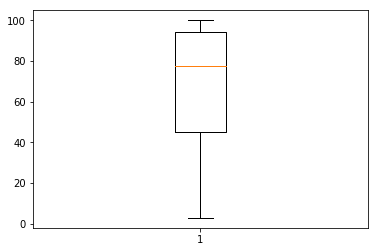

In [86]:
# boxplot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(boston_df["AGE"])

データフレームに対して、一括で箱ひげ図を表示することもできる。

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
MEDV          AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

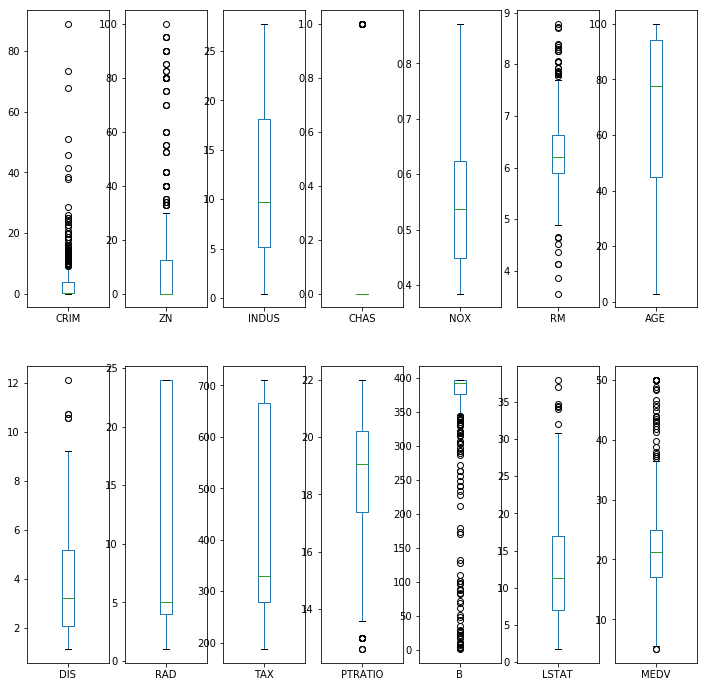

In [90]:
boston_df.plot(kind="box",subplots =True, sharex =False,figsize=(12,12),layout=(2,7))

#### 外れ値の影響

### 散布図
散布図(scatter plot) を用いることで大まかな相関関係を確認することができる。

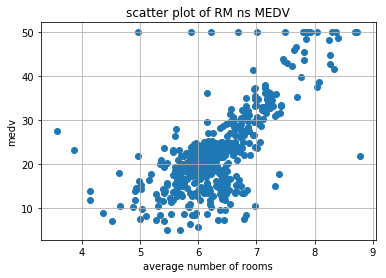

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [49]:
# scatter plot
plt.scatter(boston_df["RM"],boston_df["MEDV"])
plt.title("scatter plot of RM ns MEDV")
plt.xlabel("average number of rooms")
plt.ylabel("medv")
plt.grid()
plt.show()
boston_df[["RM","MEDV"]].corr()

### Pair Plot
データの種類が多い場合、ひとつひとつ散布図を描くのは効率が悪いのでpair plotを使うほうがいいです。

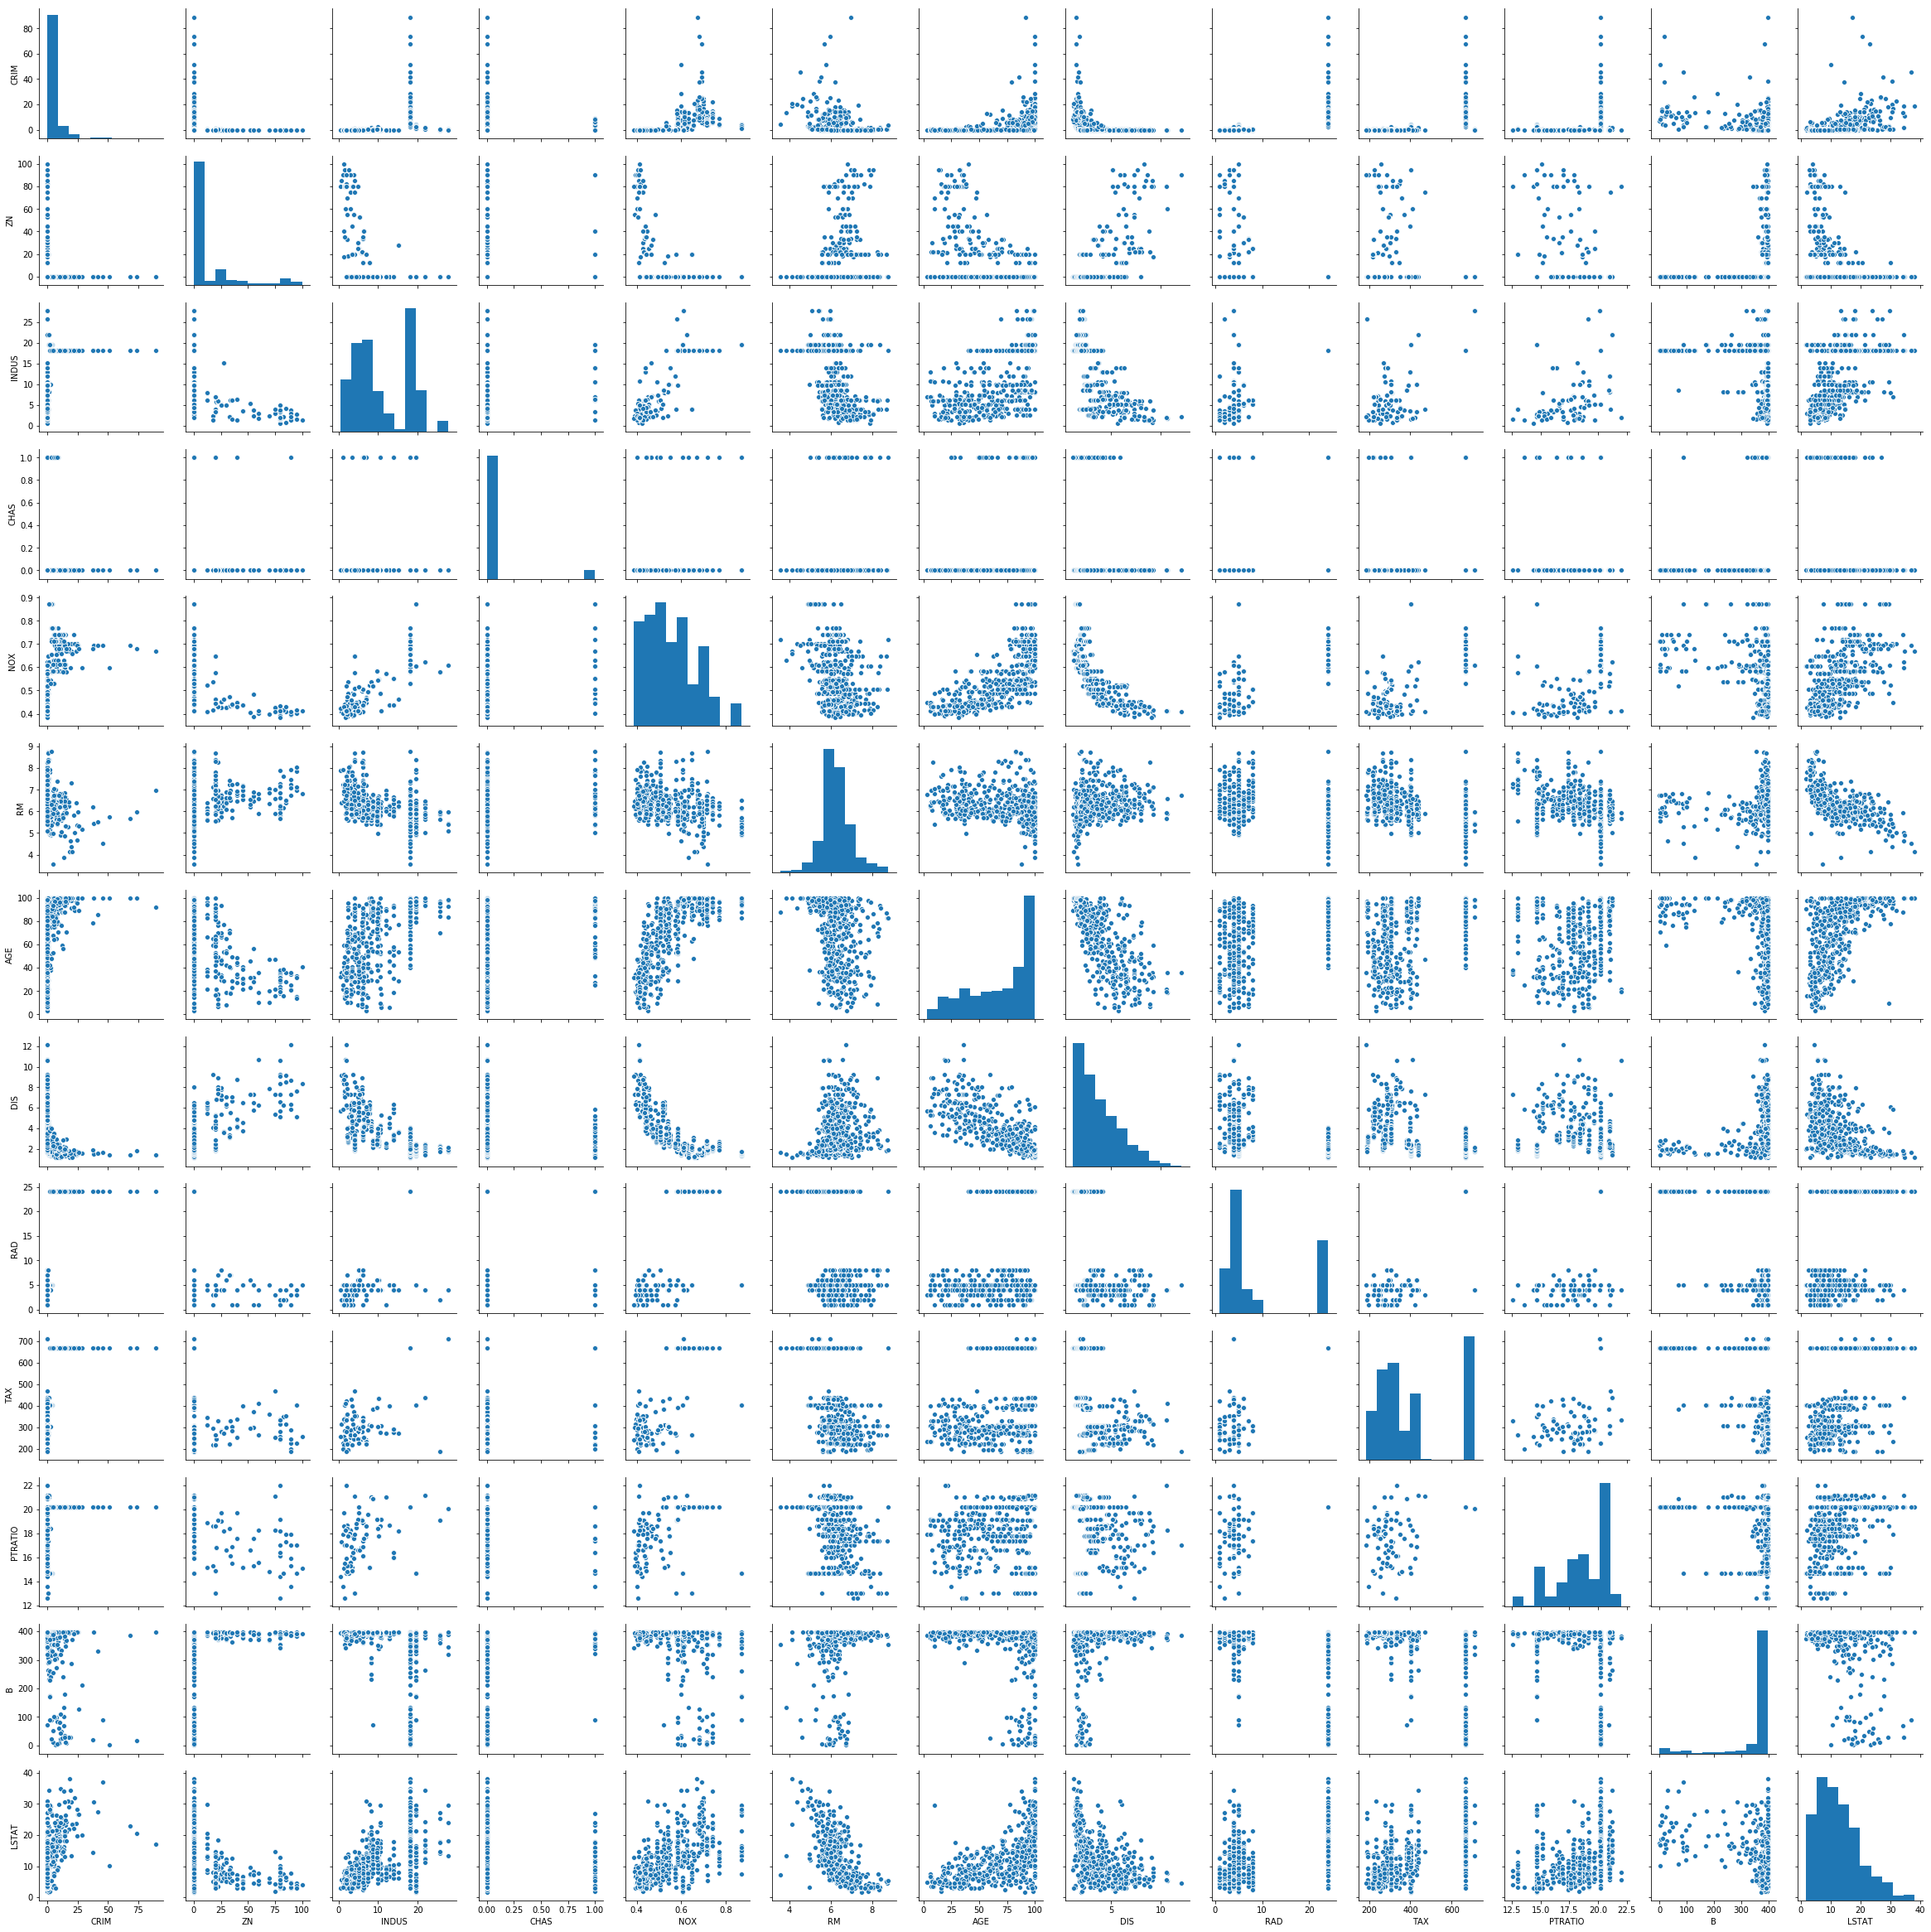

In [39]:

# pair plot
# データの大まかな情報を得るために使う
sns.pairplot(boston_df)

seabornはpairplotする際に回帰直線を描くこともできます。

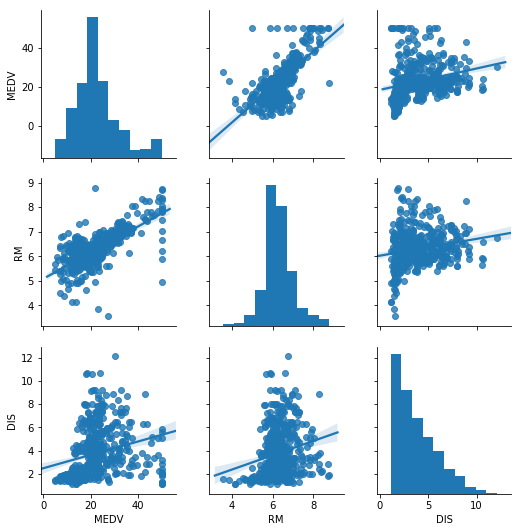

In [199]:
sns.pairplot(boston_df,kind = "reg",vars =["MEDV","RM","DIS"])

### heatmap
heatmapを使うことで変数間の相関係数を一目で確認することができる。

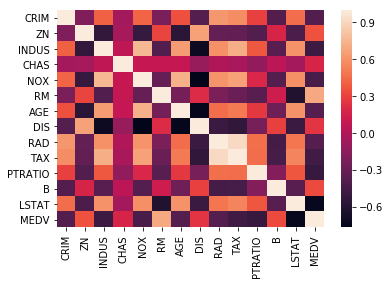

In [51]:
# sheatmap
sns.heatmap(boston_df.corr())

# 高次元データの可視化・分析

人間の認知能力からして、高次元のデータをそのまま認識することは困難です。せいぜい３次元が限界です。

例えば167か国の

+ child mort: 乳幼児死亡率(５歳以下の子供の千分率)
+ exports: 総GDPのうち、輸出が占める割合(\%)
+ health: 総GDPのうち、医療費が占める割合（\%）
+ imorts: 総GDPのうち、輸入が占める割合(\%)
+ income: 一人当たり純所得
+ inflation: 毎年のGDP成長率
+ life expec: 現在の乳幼児死亡率が続いた場合の新生児の寿命の推定値
+ total_fer: 現在の出生率が続いた場合の女性一人当たりの出生率
+ gdpp: 一人当たりGDP

についてまとめた次のデータについて調べてみましょう。9次元のデータについて想像することができるでしょうか。

おそらく難しいでしょう。そこでPCAという手法を使って高次元データの特徴量を抽出して３次元に描画してみます。

In [195]:
countries_df = pd.read_csv("./data_store/Country-data.csv")
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [97]:
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [82]:
countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5735A4F60>,
      dtype=object)

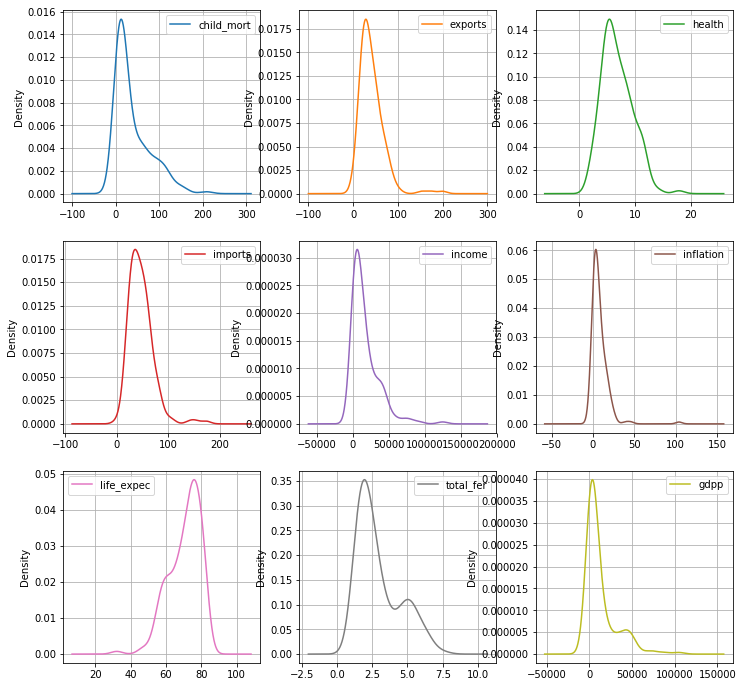

In [92]:
countries_df.plot(kind="density",subplots=True,grid=True,layout=(3,3), sharex=False,figsize=(12,12))

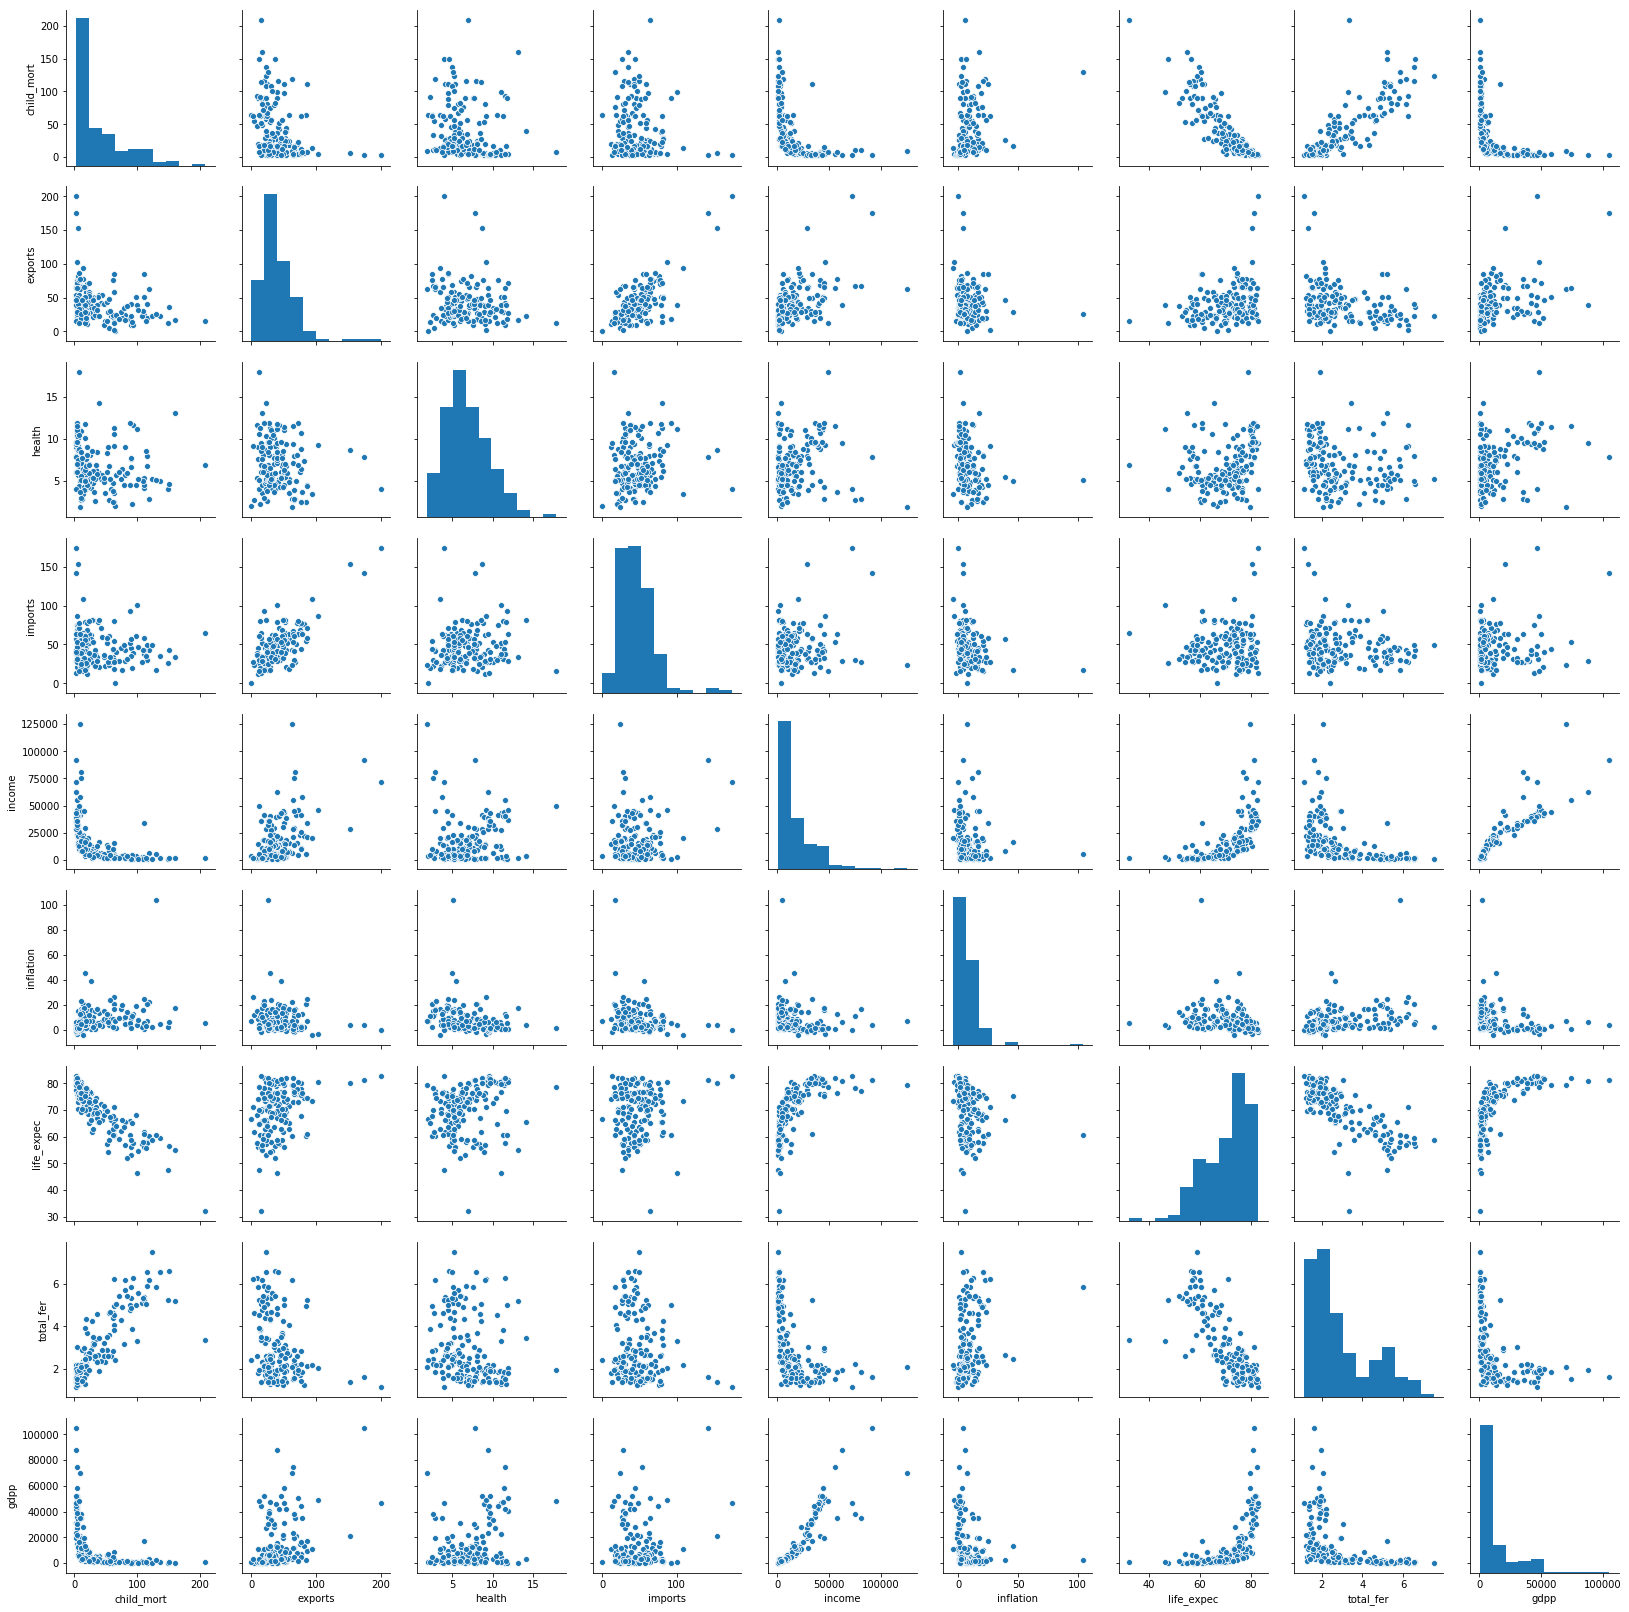

In [93]:
sns.pairplot(countries_df)

In [99]:
len(countries_df["country"].unique())

167

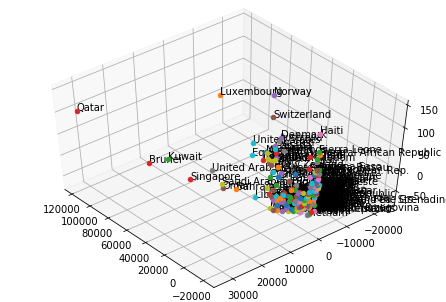

In [238]:
pca =PCA(n_components=3).fit(countries_df.loc[:,"child_mort":].values)
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=50, azim=140)

vs=pca.transform(countries_df.loc[:,"child_mort":])
#ax.scatter3D(x_pm,x_nox,Y)
#plt.show()
for i in range(167):
    
    ax.scatter3D(vs[i,0].reshape(-1,1),vs[i,1].reshape(-1,1),vs[i,2].reshape(-1,1))
    ax.text(
    vs[i,0],vs[i,1],vs[i,2],countries_df["country"].values[i],
    )
plt.show()

In [234]:
countries_df_with_index= countries_df.set_index("country")
countries_df[countries_df["country"].isin([
    "Haiti",
    "Algeria",
    "Central African Republic",
    "Sierra Leone",
    "Luxembourg",
    "Norway",
    "Switzerland",
    "United States",
    "Brunei",
    "Kuwait",
    "Iran"
])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
71,Iran,19.3,24.4,5.60,19.4,17400,15.900,74.5,1.76,6530
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


PCAで抽出した成分で表現した各国の三次元空間上の位置関係は各国のデータ間の類似性を示しています。
(ただし、データを正規化していないのでincomeやgdppの影響を受けているようにも見えます。)

# 確率・統計

## 質的変数に関する分析

### クロス集計

2つのカテゴリーに属するデータをそれぞれのカテゴリーで同時に分類し、その度数を集計したものをクロス集計表といいます。
0番から9番までの人について、商品Aを購入したかどうかを次の配列
\[[0,1,1,0,1,0,0,0,1,0]\]
であらわします。
また、0番から9番までの人が、商品Bを購入したかどうかを次の配列

\[[1,1,0,1,0,0,1,1,0,0]\]
であらわします。

まず、このデータについてクロス集計表を作成し、次に商品Aの購入と商品Bの購入に相関関係があるか調べます。

In [6]:
Product_A = np.array([0,1,1,0,1,0,0,0,1,0])
Product_B = np.array([1,1,0,1,0,0,1,1,0,0])
product_df = pd.DataFrame({"A":Product_A,"B":Product_B})
pd.crosstab(product_df.A,product_df.B,margins = True)

B,0,1,All
A,,,
0,2,4,6
1,3,1,4
All,5,5,10


相関関係を調べます。0と1からなる変数に対して計算される相関係数 ```ファイ係数```を使って相関係数を求めます。
相関係数は```np.corrcoef```関数で調べることができます。

In [7]:
np.corrcoef(Product_A,Product_B)

array([[ 1.        , -0.40824829],
       [-0.40824829,  1.        ]])

商品Aの購入と商品Bの購入には弱い負の相関関係があることがわかりました。

## 統計的検定

## 確率分布
### 二項分布とポワソン分布
一定期間nの間にある事象が起こる確率pについて考えるとき、ある事象が起きるか、起こらないかのベルヌーイ試行と考えることができる。
ある事象が起きる確率をp, ある事象が一定期間nの間に起こる回数を確率変数Xと置くと、一定期間の間にk回その事象が起こる確率は次のように書ける.

$$
P(X = k) = {}_n C_k p^k (1-p)^{n-k}
$$

nが十分大きく、pが十分小さいとき$np=一定$と考えられ、$np=\lambda$ と置くと、この事象が起こる回数Xはポワソン分布に従うと考えることができます.


つまり、ある期間に平均$\lambda$回起こる現象が、ある期間にX回起きる確率の分布をポワソン分布といい確率変数Xは次の分散・平均のポワソン分布に従うといえます。

\begin{eqnarray}
var(x) =\lambda\\ E(x)= \lambda
\end{eqnarray}

+ ある事象が一定期間の間に何回起きるか、という偶然のメカニズムを表現する確率分布
+ 交通事故や野球チームのホームランの数のような、なかなか起こりにくいことの確率分布を表現する


### 例1: N回電話がかかってくる確率の予測

以下では、```scipy.stats```ライブラリの```poisson```を使い、15時から16時の間に平均３回電話がかかってくることがわかっているとき、同じ時間帯にN回電話がかかってくる確率を求める例を示す。


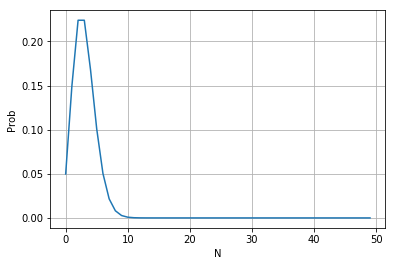

In [253]:
# lambda = 3 のpoisson分布の可視化
x = [i for i in range(50)] # [0,1,2,3,4,.....,49]
plt.plot(x, poisson.pmf(x,l))
plt.xlabel("N")
plt.ylabel("Prob")
plt.grid()

In [11]:
# ５回かかってくる確率
l = 3
poisson.pmf(5,l)*100

10.081881344492457

In [12]:
# 5回以上かかってくる確率
1 - poisson.cdf(4,l)

0.1847367554762278

### 不良品の予測
ある製品Aを作る工場では、平均して200個に１個の割合で不良品が発生することがわかっている。
製造された製品Aを10個抜き取るとき、この中に不良品が含まれる個数がポアソン分布に従うとき、不良品が１個含まれる確率をもとめる。

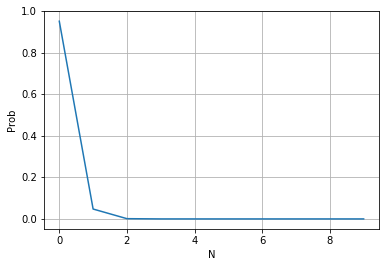

In [254]:
# 分布の可視化
l_defective = 0.05
cnts_defective = [i for i in range(10)] # 不良品の数、 [0,1,2,...,9]
plt.plot(cnts_defective,poisson.pmf(cnts_defective,l_defective))
plt.xlabel("N")
plt.ylabel("Prob")
plt.grid()

```poisson.pmf(n,l)```は平均$l$のポワソン分布に従う確率変数がnをとる確率を返す

In [22]:
poisson.pmf(1,l_defective)*100

4.756147122503571

# ランダム化比較試験 | RCT 

## 効果測定とサンプリングバイアス


## RCTの概要
ある施策の効果を考えるため、実験に参加する人を介入群と対照群に分ける場合を考えます。

下の図のように介入群に介入しなかった場合の効果、対照群に介入した場合の効果は観測することができません。
わかりやすい例を挙げると、同じ人Xさんに投薬を施した場合の結果と施さなかった場合の効果を同時に観測することはできません。

しかし、ある人Aさんにとっての投薬したときの結果$r_A$と別の人Bさんへ投薬しなかったときの結果$r_B$があるとき、AさんとBさんでは健康状態、年齢、体重など様々な要素に違いがあるので$y_A - y_B $は投薬の因果関係を説明できません。

|\\ |y=(0)|y=(1)|
|---|---|---|
|x=0|観測できる|観測できない|
|x=1|観測できない|観測できる|

次に教育訓練がキャリアに与える影響を調べるため、誰でも参加可能な職業訓練を受けた人が再就職に成功したかどうか調べる例を考えてみましょう。

この例では、誰でも職業訓練に参加することができるので、職業訓練に参加したグループと参加しなかったグループでは、職業訓練に参加したかどうか以外の要素も異なる可能性が高いです。

職業訓練に自主的に参加する人たちは学習意欲が高く、もともと仕事に就きやすい可能性があります。
したがって、参加した人と、参加しなかった人の再就職の可否を調べても、再就職と職業訓練の因果関係を説明できません。

Xを職業訓練の参加・不参加をあらわす変数(X=0,1), Uを職業訓練以外のさまざまな要素、Yを再就職の可否をあらわす変数(Y=0,1)とすると$Y=g(X,U)$ のようにあらわすことができます。


ここで
+ X=0のときのYをY(0)=g(0,U)
+ X=1のときのYをY(1)=g(1,U)

とします.

先に述べたように、Y(1)-Y(0)は、介入Xの因果効果を説明できません。
また、$E[Y(1)-Y(0)]$についても、介入以外の平均的な要素が同じでない場合（例えば、学習意欲に違いがある場合）、介入Xの因果効果を説明できません。

介入Xの因果効果を調べるには、介入をランダムにすることで、Y(1)の時の$E[U]$とY(0)の時のE[U]を一致させる必要があります。


## 事例

### オンライン広告の効果測定(A/Bテスト)
オンライン広告やウェブサイトの見た目の効果を測定するためにしばしばABテスト（ユーザーごとにランダムに表示するコンテンツを切り替えるテスト）が行われています。


### 治験

## シミュレーション
シミュレーションするまでもないと思いますが、せっかくなのでpythonを使ってRCTを実装してみます。

まず、500人の身長・点数・性別・年齢に関するデータを生成します。



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280DAC500B8>,
      dtype=object)

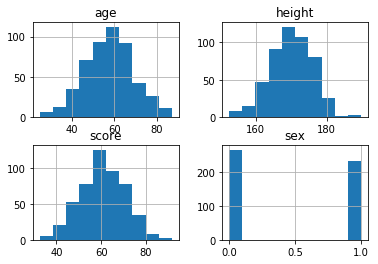

In [372]:
n = 500
test_group = 250

height = np.random.normal(170,5.8,n).reshape(-1,1)
score = np.random.normal(60,10,n).reshape(-1,1)
sex  = np.random.randint(0,2,n).reshape(-1,1)
age = np.random.normal(57,12,n).reshape(-1,1)
matrix = np.hstack((height,score,sex,age))

sim_df = pd.DataFrame(matrix,columns=["height","score","sex","age"])
sim_df.hist()



次にそのデータをランダムに250対250に分割します。

In [374]:
test_group_df = sim_df.sample(n=test_group)
control_group_df = sim_df.drop(test_group_df.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280DAADB9B0>,
      dtype=object)

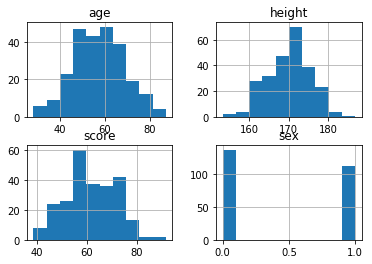

In [375]:
control_group_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280DAF58320>,
      dtype=object)

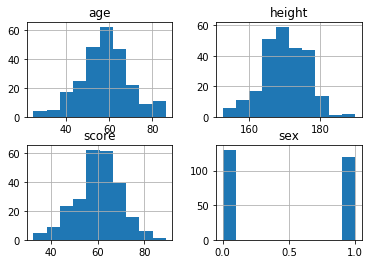

In [376]:
test_group_df.hist()

テスト群とコントロール群は平均的に釣り合っています。

In [384]:
print(test_group_df["height"].mean(),control_group_df["height"].mean())
print(test_group_df["age"].mean(),control_group_df["age"].mean())
print(test_group_df["score"].mean(),control_group_df["score"].mean()     )


169.88237034208655 170.02494405891528
57.9495552939955 57.30301157713351
59.994885790580746 61.620520783380705


このとき、ある介入をテスト群に行ってスコアの平均が対照群と比べて改善した場合、ある介入$\rightarrow$スコアの平均の増加 という因果効果を説明することができます。
(たまたまスコアが上がりやすい別の要因がテスト群にあったわけではないと説明できます)

## 効果測定とトレードオフ

### バンディットアルゴリズム

# 回帰分析

## 回帰分析の前提

1. 真のモデルが $y_i = \alpha + \beta x_i+ u_i$ であらわされる
2. $E(u_i)$ = 0 | 誤差項の期待値は０ 
3. $var(u_i) = \sigma^2$ | 誤差項の分散はすべてのiについて等しい
4. $cov(u_i,u_i)$ = 0
5. $E{[u_i| x_i]} = 0$
6. $u_i$は正規分布に従う. 2,3,4を合わせると$N(0,\sigma^2)$に従う

$E{[u_i|x_i]}\neq 0$のとき、x_iがy_iに与える効果を過大評価してしまいます。

線形回帰の仮定を満たしているときの推定量をBULE(Best Linear Unbiased Estimator)と表現する場合があります。


## 最小二乗法について


モデルを次のようにおきます。

\begin{align}
y_i = \alpha + \beta x_i + u_i
\end{align}

パラメータ$\alpha,\beta$の推定値をa,b とすると、
残差二乗和```SSR(a,b)```を最小にするようなa,b が$\alpha,\beta$です。
\begin{align}
SSR(a,b) = \sum_i^n{(y_i - a -bx_i )^2}
\end{align}

$\alpha,\beta$を求めるには、SSR(a,b) はa,bに関する２次関数なのでSSR(a,b)をa,bそれぞれについて微分して最小化の必要条件を求めます。

\begin{align}
-2\sum_i^n{(y_i -a -bx_i)}\\-2\sum_i^n{(y_i-a-bx_i)x_i}
\end{align}

つまり、SSR(a,b)をa,bについて偏微分した上の二つの式について

\begin{align}
 \bar{y} = \alpha + \beta \bar{x}\\ -2\sum_i^n(y_i-\alpha -\beta x_i)x_i = 0
\end{align}

が成り立ちます。

これらをとくと

\begin{align}
\beta = \frac{\sum_i^n{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_i^n{(x_i - \bar{x} )^2}}
\end{align}

が得られます。

$\alpha,\beta$は不偏性・一致性を持ちます。

## 基本的な線形回帰モデル
下の散布図のように、RMとMEDVには正の相関があるように見えます。
そこで、先に使った[boston_df](#サンプルデータ)のRMとMEDVについて線形回帰を行います。

線形回帰を行うには```sklearn```の```LinearRegression```を使います。

```LinearRegresson()```インスタンスの```coef_```でxの係数が、```intercept_```で切片が取得できます。

なお、LinearRegressionを使えば簡単に回帰係数を推定できますが、因果関係を正しくとらえるためには誤差項の期待値、分散や説明変数の誤差項との独立性などに注意する必要があります。

回帰分析の前提５に関する議論は[iv推定](#iv推定と二段階最小二乗法)のセクションで扱います。


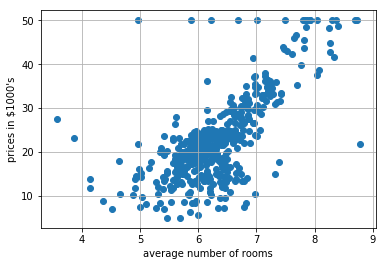

In [257]:
plt.scatter(boston_df["RM"],boston_df["MEDV"])
plt.xlabel("average number of rooms")
plt.ylabel("prices in $1000\'s")
plt.grid()

(9.10210898118031, -34.67062077643857)

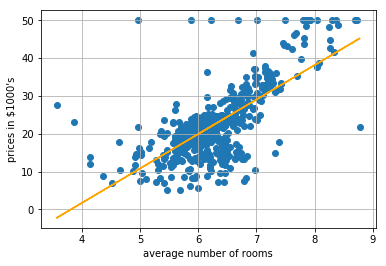

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = boston_df[["RM"]].values
Y = boston_df["MEDV"].values
lr.fit(x,Y)
plt.scatter(x,Y)
plt.plot(x,lr.intercept_+lr.coef_[0]*x,color="orange")
# plt.plot(x,lr.predict(x))でも同様の結果が得られる
plt.xlabel("average number of rooms")
plt.ylabel("prices in $1000\'s")
plt.grid()
lr.coef_[0],lr.intercept_

MEDVは次の式で推測されます。

\begin{equation}
MEDV = RM × 9.1021  -34.6706
\end{equation}

In [84]:
# モデルの簡易的な評価
# 誤差二乗和を使う
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, lr.predict(x))

43.60055177116956

### 特性化

知りたい事柄に応じて次のような特性化が考えられます。

**Xが１単位変化したときYが平均何%変化するか**

$$
log Y_i  = \beta_1 + \beta_2 X_i + u_i
$$
**Xが1%変化したときにYが平均何単位変化するか**

$$
Y_i = \beta_1 + \beta_2 log X_i + u_I
$$
**Xが1%変化したとき、Yが平均何%変化するか**

$$
log Y_i = \beta_1 + \beta_2 log X_i + u_i
$$

## iv推定と二段階最小二乗法

### iv推定とは
例えば、年収(wage)と教育年数(year)について次のようなモデルを考えます。

\begin{align}
log(wage_i) = \beta_0 + \beta_1 year + u_i
\end{align}

このモデルでは教育年数を説明変数にしていますが、教育年数は誤差項に含まれる「能力」などの要素と相関しています。そのため最小二乗法を用いて推定した$\beta_1$の値には内生性のバイアスが生じます。

このような場合に、
1. year と強い相関がある
2. wageと全く相関がない


変数$z$を使うことでバイアスを取り除いてパラメータを推定することができます。

この変数zを操作変数といいます。

少しかみ砕いて説明すると

$$
Z \rightarrow X \rightarrow Y 
$$

という関係があるとき、$Z$が$Y$に相関しないならば、$Z$が$Y$に与える効果= ($Z$が$X$に与える効果 )× ($X$が$Y$に与える効果)と考えられます。

このとき、

$X$の$Y$に与える効果=$\frac{ZがYに与える効果}{ZがXに与える効果 }$ 

と考えることができます。

C: 消費, Y: 所得、 I: 投資、　u: 誤差項、　$0<\beta<1$のもとで,以下のようなモデルを考えます。

\begin{eqnarray}
    C_t &=& \alpha + \beta Y_t + u_t\\
    Y_t &=& C_t + I_t
\end{eqnarray}

一つ目の式を変形すると、

\begin{equation}
Y_t = \frac{\alpha}{1-\beta} + \frac{I_t}{1-\beta} + \frac{U_t}{1-\beta}
\end{equation}

これらの式について考えると、$Y_t$は$U_t$と相関している、つまり内生性があります。

内生性があるとき

$$
\hat{\beta} \xrightarrow{p} \beta + \frac{Cov(Y_t,u_t)}{V(Y_i)} \neq \beta
$$

となるので、$Y$の値が過大評価されます。

まず、パラメータの真の値を$\alpha = 2.5, \beta = 0.6$と設定し、単純にパラメータをOLS推定した結果が真の値とずれるということを確認します。

-0.43903151609472024 0.6416736366506121


(array([  6.,  13.,  56., 129., 194., 270., 213.,  91.,  24.,   4.]),
 array([0.60170612, 0.60928754, 0.61686897, 0.6244504 , 0.63203182,
        0.63961325, 0.64719467, 0.6547761 , 0.66235753, 0.66993895,
        0.67752038]),
 <a list of 10 Patch objects>)

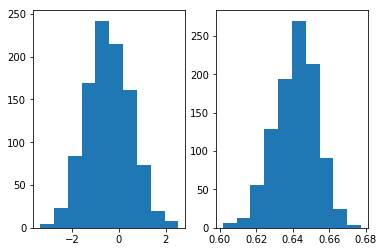

In [61]:
a = 2.5
b = 0.6
n = 1000

ols_result_a = []
ols_result_b = []

for i in range(n):
    I_t = np.arange(1.0,51,0.5)
    U_t = np.random.normal(0,5,100)
    Y_t = (a/(1-b)) + (I_t/(1-b)) +(U_t/(1-b))
    C_t = a + b*Y_t + U_t

    lr_consumption = LinearRegression().fit(Y_t.reshape(-1,1),C_t.reshape(-1,1))
    ols_result_a.append(lr_consumption.intercept_[0])
    ols_result_b.append(lr_consumption.coef_[0][0])
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
print(np.mean(ols_result_a),np.mean(ols_result_b))
ax1.hist(ols_result_a)
ax2.hist(ols_result_b)

このように、$\alpha$の値も、$\beta$の値も真の値、2.5, 0.6からずれているのがわかります。
内生性のバイアスを取り除くために２段階最小二乗法(iv推定)を試してみましょう。

$I_t$を操作変数としてYの値を予測し、予測したYの値を使って$C_t$をOLS推定することでパラメータ$\alpha$, $\beta$を正確に予測することができます。

### 二段階最小二乗法

\begin{eqnarray}
Y_{Pred} &=&  \alpha_y + \beta_y I_t + U_{yt}
\\ C_t &=& \alpha + \beta Y_{pred} + U_t 
\end{eqnarray}

2.5511282287772556 0.5992968524369785


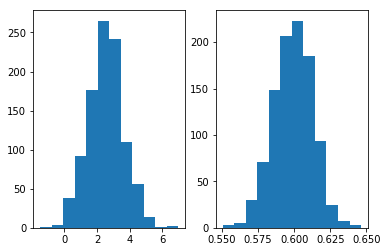

In [76]:
a = 2.5
b = 0.6
n = 1000

ols2_result_a = []
ols2_result_b = []

for i in range(n):
    I_t = np.arange(1.0,51,0.5)
    U_t = np.random.normal(0,5,100)
    Y_t = (a/(1-b)) + (I_t/(1-b)) +(U_t/(1-b))
    C_t = a + b*Y_t + U_t
    # 1. Y_tをIで説明する
    lr_Y_pred = LinearRegression().fit(I_t.reshape(-1,1),Y_t.reshape(-1,1))
    Y_t_pred= lr_Y_pred.predict(I_t.reshape(-1,1))
    # 2. C_T を Iで説明したY_t_predで説明する
    lr_C_t = LinearRegression().fit(Y_t_pred,C_t.reshape(-1,1)) 
    ols2_result_a.append(lr_C_t.intercept_[0])
    ols2_result_b.append(lr_C_t.coef_[0][0])
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(ols2_result_a,bins=12)
ax2.hist(ols2_result_b,bins=12)
print(np.mean(ols2_result_a),np.mean(ols2_result_b))


では、先のデータセットについて勾配法を用いてみましょう。

パラメータ$\alpha$,$\beta$の予測値の平均がそれぞれ2.55112822...., 0.5992968...と真の値にかなり近くなっているのがわかると思います。

このように、操作変数法をつかい、内生性のバイアスを取り除くことで真のパラメータの値をより正確に予測することができます。

## コラム

### 勾配法

単回帰では

$$
y_i = \alpha + \beta x_i 
$$
という一次のモデルを仮定します。

ベクトル・行列式を用いて考えると、
$$
\vec{\hat{y}} = X\vec{w}
$$
となるような$\vec{w}$を求めます。

これをよりわかりやすくすると次のよう書けます。

$$
\vec{\hat{y}} = w_0 + w_1 \vec{x}
$$

これはすなわちn件のデータに関する次のような式です。

$$
\left[
\begin{array}
\hat{y_1}\\
\hat{y_2}\\
\vdots \\
\hat{y_n}
\end{array}
\right] = \left[
\begin{array}\
 w_0 + w_1 x_1\\
w_0 + w_1 x_2\\
\vdots \\
w_0 + w_1 x_n
\end{array}
\right] 
$$

ここで$\vec{w}, X$を次のようにおきます。

$$
\vec{w} = \left( \begin{array}\ w_0\\ w_1 \end{array} \right)
\\
\\X = \left[ \begin{array}\ 1 & x_1 \\ \vdots &  \vdots \\ 1 & x_n \end{array} \right]
$$

$\vec{w}, X$を用いてこれを省略したものが$\vec{\hat{y}}= X\vec{w}$の式になります。

最初の例では残差二乗和```SSR(a,b)```を$\sum{(y_i -a -bx_i)^2}$と置きましたが、ここでは行列を用いて次のように表現することができます。

$$
SSR = \frac{1}{2n}\sum_i^n{(y_i -\vec{w}^T \vec{x_i})^2}
$$

ここで上の式を微分すると次のようになります。

$$
\frac{SSR}{d \vec{w}} = \frac{1}{d \vec{w}} \left[ \frac{1}{2n}\{ (y_1 - \vec{w}^T \vec{x_1})^2+ ...+ (y_n- \vec{w}^T \vec{x_n})^2  \}
\right] \\
= \frac{1}{2n} \left[ 2(y_1 - \vec{w}^T \vec{x_1})(- \vec{x_1})+ ...+ 2(y_n - \vec{w}^T \vec{x_n})(- \vec{x_n}) \right]\\
= - \frac{1}{n} \sum \{(y_i - \vec{w}^T \vec{x_i})\vec{x_i}\}\\
=  - \frac{1}{n} X^T (\vec{y} - \vec{\hat{y}})
$$


SSRは$\vec{w}$の関数なので、SSRを最小化するには$\vec{w}$について微分した上の式が０になるような$\vec{w}$を求めればいいです。

しかし、計算機では普段私たちがするようなやり方（代数の計算をイメージしてください）で関数を微分し、その関数を０にするような値を求めることは難しいです。

そこで以下のような手法を用いて微分した関数を最小にする$\vec{w}$を求めます。

微分係数すなわち式$ - \frac{1}{n}X^T(\vec{y} - \vec{\hat{y}})$は、$\vec{w}$が最小値をとる$\vec{w}$より大きいとき（小さいとき）プラス（マイナス）になります。

そこで、$\vec{w}$を適当に決め、傾きを徐々に０に近づけていくことで最終的に```SSR```が最小値をとるような$\vec{w}$を近似的に求めることができます。

グラフが凸であることを仮定して、次の式のように傾きの大きさに比例する値を$\vec{w}$から引いて$\vec{w}$を更新していきます。(ただし、$\alpha$は定数)

$$
\vec{w} \leftarrow \vec{w} - \alpha \frac{dE}{d\vec{w}}
$$

傾きが大きい、つまり最小値をとる値から離れている場合は$\vec{w}$は大きく更新されます。最小値をとる$\vec{w}$に近づくにつれて$\vec{w}$の変化は小さくなります。

$\vec{w}$の変化が十分に小さくなったときの$\vec{w}$の値を利用することで最小値をとる$\vec{w}$を近似的に求めることができます。多くの関数の特徴として更新を十分に繰り返せば傾きは十分に小さくなると考えられます。

このアルゴリズムは$\vec{w}$の位置が関数の坂を下っていくように変化することから勾配法と呼ばれています。

十分な回数繰り返すことで必要な値を求める手法はしばしばコンピュータの数値計算で用いられています。

Text(0.5, 1.0, 'compare result of gradient method to that of sklearn')

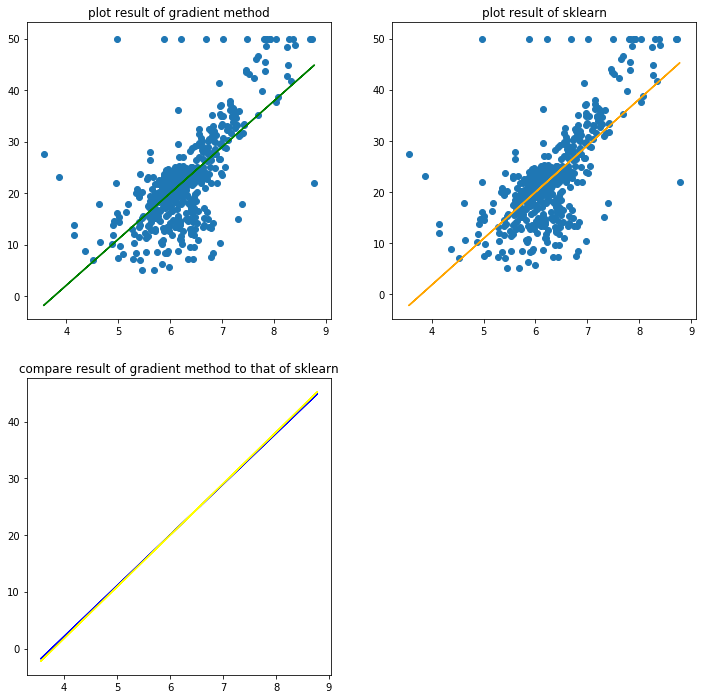

In [345]:
x = boston_df[["RM"]].values
# x =[[x0].[x1],[x2],...] 
y = boston.target # y = [y0,y1,y2,...]
x = np.insert(x,0,1.0,axis = 1) #[[1,x0],[1,x1],[1,x2],...] 1.0 は定数項を表現するため
w = np.random.random(len(x[0])) # 重みの初期値
LEARNING_RATE = 0.01
EPOCHES = 30000 # これを増加させると回数を増やすほどsklearnのモデルに近づくことがわかる

def y_pred(x,w):
    return x @ w

for i in range(EPOCHES):
    yd = ((y - y_pred(x,w)) @ x)/len(x)
    w +=  LEARNING_RATE * yd
lr = LinearRegression().fit(x,y)
pred = lr.predict(x)
fig = plt.figure(figsize=(12,12))
ax_gradient = fig.add_subplot(2,2,1)
ax_sklearn = fig.add_subplot(2,2,2)
ax_compare = fig.add_subplot(2,2,3)
ax_gradient.plot(x.T[1],x@w,color="green")
ax_gradient.scatter(boston_df["RM"],boston_df["MEDV"])
ax_gradient.set_title("plot result of gradient method")
ax_sklearn.plot(x.T[1],pred,color="orange")
ax_sklearn.scatter(boston_df["RM"],boston_df["MEDV"])
ax_sklearn.set_title("plot result of sklearn")
ax_compare.plot(x.T[1],x@w,color="blue")
ax_compare.plot(x.T[1],pred,color="yellow")
ax_compare.set_title("compare result of gradient method to that of sklearn")


### 行列式

ややこしい事をしましたが、最小二乗推定量$\hat{b}$を求めるだけなら行列式を使えば一瞬です。
$\hat{b} = (X' X)^{-1} X' y$をそのままPythonで実装します。

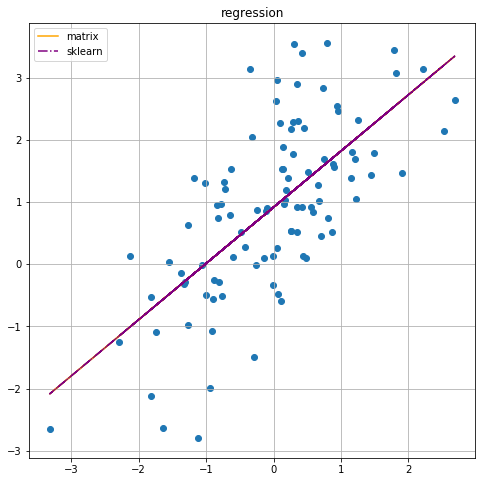

In [46]:
n = 100
u = np.random.normal(size=(n,1)) # 誤差項 u
a = np.full((2,1),1)
X = np.hstack((np.ones((n,1)),np.random.normal(size=(n,1)))) # 1 + bX
#y = np.dot(X,)
y = np.dot(X,a) + u # y = a + bX + u
b_hat = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
plt.figure(figsize=(8,8))

plt.scatter(X[:,1],y)
lr = LinearRegression().fit(X,y)
plt.plot(X[:,1],np.dot(X,b_hat),color="orange",label="matrix")
plt.plot(X[:,1],lr.predict(X),color="purple",linestyle="-.",label="sklearn")
plt.title("regression")
plt.legend()
plt.grid()


**参考文献**

https://to-kei.net/neural-network/optimizer/

https://orizuru.io/blog/machine-learning/linear-reg/

## 重回帰分析 | multiple regression

複数の要因を同時に考えるモデル

説明変数が一つしかない場合、欠落変数があるため回帰分析の前提が成り立たなくなる場合があります。
そこで説明変数を複数にした以下のようなモデルをつかうことで因果関係を正しく調べられることがあります。

\begin{align}
y_i = \alpha + \beta_1x_{1i} + \beta_2x_{2i} + ... + \beta_kx_{ki} + u
\end{align}
### 完全な多重共線性

証明は割愛しますが、完全な多重共線性がある場合, つまり以下のような関係が成り立つ場合、重回帰分析の最小二乗推定は不可能です。
\begin{align}
x_{ji} = c + \sum{\gamma_lix_li}, \\ l\neq j \\ \gamma_l は適当な定数
\end{align}

なお、完全な多重共線性に対処するには説明変数をひとつ削ればいいです。

### ３次元データの可視化

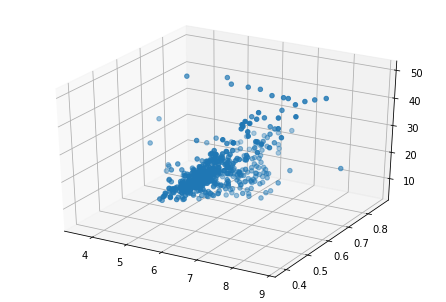

In [173]:

x_pm = boston_df[["RM"]]
x_nox = boston_df[["NOX"]]
Y = boston_df[["MEDV"]]
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(x_pm,x_nox,Y)
plt.show()

### 重回帰分析

単回帰と同じくLinearRegressionに説明変数,目的変数を渡せばいい。

係数と切片も```coef_```、```intercept_```で取得できる。

一般的に重回帰分析を行う場合は正規化したほうが良いスコアが出るがここでは割愛する。

In [169]:
explanatory_variables = boston_df[["RM","NOX"]]
lr = LinearRegression()

lr.fit(explanatory_variables,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 結果の可視化
3dplot上にmeshgridを用いて重回帰分析の結果を表示することができる。

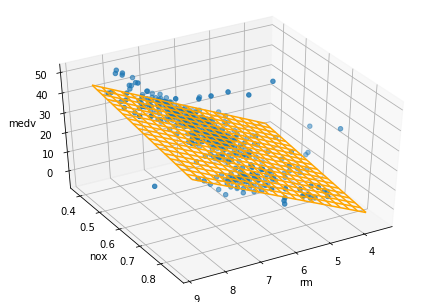

In [198]:

x_pm = boston_df[["RM"]]
x_nox = boston_df[["NOX"]]
Y = boston_df[["MEDV"]]

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=40, azim=60)
ax.set_xlabel("rm")
ax.set_ylabel("nox")
ax.set_zlabel("medv")

ax.scatter3D(x_pm,x_nox,Y)


grid_x_pm = np.arange(x_pm.min()[0],x_pm.max()[0],(x_pm.max()[0]-x_pm.min()[0])/20)
grid_x_nox = np.arange(x_nox.min()[0],x_nox.max()[0],(x_nox.max()[0]-x_nox.min()[0])/20)
grid_x_pm,grid_x_nox = np.meshgrid(grid_x_pm,grid_x_nox)
grid_y = lr.coef_[0][0]*grid_x_pm + lr.coef_[0][1]*grid_x_nox + lr.intercept_[0]
ax.plot_wireframe(grid_x_pm,grid_x_nox,grid_y,color="orange")
plt.show()

3次元についても本質的には２次元の最小二乗法と同じように考えます。つまり、各点からの距離の２乗の総和が最小になるような平面を得られるようなパラメータ$\alpha,\beta_1,\beta_2$を計算します。

### 交差項を用いた回帰

説明変数$A_i$と説明変数$B_i$に相互作用がある場合に$A_i×B_i$を説明変数に追加することで予測の制度が改善される場合があります。



RM, DISについて重回帰したモデルとそこに交差項RM×DISを追加したモデルについて考える。



\begin{align}
y_i = \alpha RM_I + \beta DIS_i + u_i\\y_i = \alpha RM_i + \beta DIS_i + \gamma (RM* DIS) + u_i
\end{align}


In [196]:
#(1)
lr_1 = LinearRegression()
lr_1.fit(boston_df[["RM","DIS"]],boston_df["MEDV"])
lr_1.coef_,lr_1.intercept_

(array([8.80141183, 0.48884854]), -34.63605017547333)

In [197]:
#(2)
lr_2 = LinearRegression()
lr_2.fit(boston_df[["RM","DIS","RM_DIS"]],boston_df["MEDV"])
lr_2.coef_,lr_2.intercept_

(array([ 5.70196086, -5.75787228,  0.9854778 ]), -15.253318707490639)

## 正則化を用いた回帰分析

正則化とは簡単に言うと最小化すべき残差に新しい項を追加することで、過学習を抑え予測の精度を高める手法のことで、しばしば説明のためのモデルではなく予測のためのモデルを構築するときに使われます。
項を加えることで回帰モデルの説明変数への当てはまりの良さは下がりますが、このモデルを使って未知の値を予測する場合の精度が改善されます。

正則化を用いた回帰モデルにはRidge回帰とLasso回帰があります。
いずれにしてもモデルがやや複雑になるので結果の解釈は難しくなります。

### Ridge 回帰

$w_j$を各説明変数の係数とすると、最小化すべき式(損失関数と呼ぶ場合もある)は
\begin{equation}
SSR\_Ridge = \sum_i^n{(y_i-\hat{y_i})^2} + \lambda\sum_i^m{w_j^2}
\end{equation}
と書けます。



### Lasso回帰

\begin{equation}
SSR\_Lasso = \sum_i^n{(y_i -\hat{y_i})^2} + \lambda\sum_i^m|w_j|
\end{equation}

Riddge回帰では係数は０になりませんが、Lasso回帰では重要度の低い説明変数の係数が０になります。

**参考**

http://gihyo.jp/dev/serial/01/machine-learning/0009?page=2

# 多項式回帰

説明変数の次元が１次元だが、目的変数は説明変数のN次多項式で生成されていると考えられるときに有効な回帰モデル。
例えば、モデルが次の式のように書ける場合。

\begin{align}
y_i = \beta_1 + \beta_2x_i + \beta_3x_i^2+\beta_4x_i^3 + u_i 
\end{align}

この場合、線形回帰ではデータを上手く表現できません。そこで多項式を用いて近似します。

多項式近似には様々な方法があるが今回はnp.polyfitを使います。
ちなみに多項式近似には以下のような方法があります。
+ np.polyfit
+ scipy.odr
+ sklearn.PolynomialFeatures

詳しい用例は[このページ](https://www.monotalk.xyz/blog/Calculate-polynomial-regression-with-python/)が参考になると思います。

以下では、統計局ホームページ日本の統計2018 2-1 人口の推移と将来人口をもとに、
xを西暦、yを総人口、あるいは総人口の予測値とします。

[統計局ホームページ/日本の統計 2018－第2章 人口・世帯](http://www.stat.go.jp/data/nihon/02.html)にデータがある。
pandasにはread_excelというメソッドがあり、インターネット上のデータもpathを指定して読み込むことができますが、~~統計局は頭が悪いので~~エクセルのセルを結合しているため、format errorになる。頑張って手打ちするか自分で加工して使ってください。

時間があったら次の記事を読むことをおすすめします。

[全人類に告ぐ。セル結合をやめろ](https://deux-hibi.hatenablog.com/entry/2018/12/09/020957)

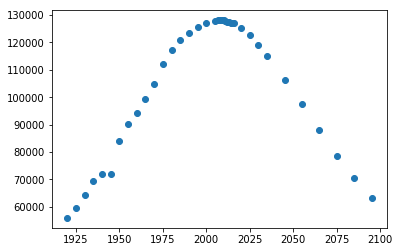

In [150]:
x = np.array([1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2020,2025,2030,2035,2045,2055,2065,2075,2085,2095])
y = np.array([55963,59737,64450,69254,71933,72147,84115,90077,94302,99209,104665,111940,117060,121049,123611,125570,126926,127768,128033,128084,128032,128057,127834,127593,127414,127237,127095,126933,125325,122544,119125,115216,106421,97441,88077,78564,70381,63125])
plt.scatter(x,y)

見ての通り、直線では近似できないが、二次曲線か四次曲線で近似できるようにみえます。

```numpy.polyfit```を用いて多項式近似を行いその結果を描画します。

ただし、polyfitの返り値は係数の配列を返すのでpoly1dメソッドを使ってyを計算します。

※poly1dはxを引数に取る関数

※ 例えば一時式ax+bについて近似した場合、polyfitは係数の配列$[\hat{a},\hat{b}]$を返す

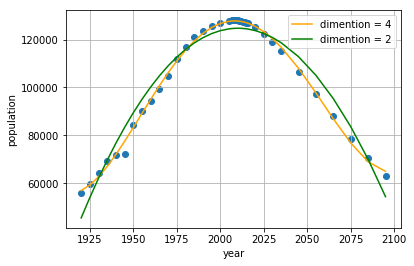

In [156]:
plt.scatter(x,y)
plt.plot(x,np.poly1d(np.polyfit(x,y,4))(x),label="dimention = 4", color="orange")
plt.plot(x,np.poly1d(np.polyfit(x,y,2))(x),label="dimention = 2",color ="green")
plt.xlabel("year")
plt.ylabel("population")
plt.legend()
plt.grid()


# 非線形な因果関係の説明

## 回帰不連続デザイン

介入対象をランダムに選択できないときに使われる手法。
ある閾値の前後付近であれば介入以外の要素はほぼ均等になっていると考えられるので、それを利用して介入の平均的な効果を推定することができます。


### 事例

## ロジスティック回帰
被説明変数が限られた値を確率的にとるときに用います。
例えば、ある人が仕事を得ることができるかどうかの確率を学歴・年齢・資格の有無などで調べるとします。
仕事を得られるかどうかは,y=0(無職)またはy=１(仕事アリ)をとります。

つまり、ここではy=1となる確率を学歴・年齢・資格の有無などの説明変数で予測します。

このとき、学歴や年齢等の要素は確率に非線形に影響を与えます。高卒と大卒では就職に与える効果が大きく違うことは明らかです。説明変数が線形に影響しない場合、OLSでは正しく結果を予想することができません。

ｘの係数が正の１次式のグラフをイメージするとわかるように、ある説明変数xが極端に大きい(小さい)ときyのとる値は0や１の範囲を超えてしまします。
そこでロジットモデルではロジスティック関数を使った回帰曲線を使います。この回帰をロジスティック回帰といいます。
ロジスティック分布の分布関数は次のようになります。
\begin{align}
P(y=1|X) = G(\beta_0 + \beta_1x_1 + \beta_2x_2+ ...+ \beta_kx_k)=G(\beta x)\\G(z)= \frac{exp(z)}{1+exp(z)}
\end{align}


---
ちなみに、ロジスティック回帰は一般線形化モデルのリンク関数にlogit関数を使った特殊例です。一般線形化モデルは分布が正規分布に従わないデータや範囲が限定されている離散値データに対しても、リンク関数を変更することで対応できるモデルです。

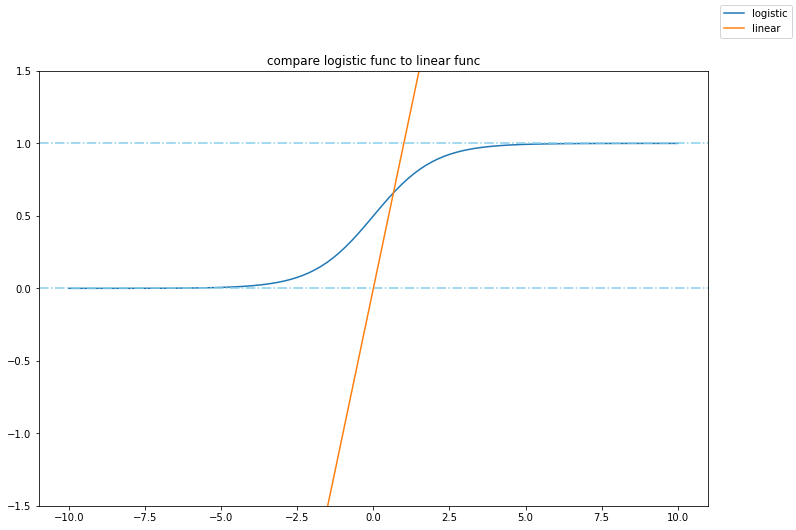

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
x = np.linspace(-10,10,100)
y = 1/(1+ np.exp(-x))
ax.plot(x,y,label="logistic")
ax.set_title("compare logistic func to linear func")
ax.axhline(1,ls="-.",color="skyblue")
ax.axhline(0,ls="-.",color="skyblue")
ax.set_ylim(-1.5,1.5)
ax.plot(x,x,label="linear")
fig.legend()

（ざっくりとした説明になりますが）このグラフをみてわかるように、一般線形化モデルでは非線形なリンク関数を間に入れることで線形回帰では表現できない有限範囲の目的変数に対しても回帰を行うことができます。

(例えば、ｘ=10のとき、線形モデルでは実際に取りうる値より極端に大きい値をとってしまします。)

## 一般線形化モデル

1. 線形予測子: $Y = aX + b$のような線形な方程式
2. リンク関数 $logY = aX + b$のような変換に使う関数

誤差が正規分布に従わない場合でも回帰をすることができます。
```逸脱度(deviance)```を最小二乗法でつかう```残差```の代わりに使います。


## 最尤法

## statsmodelを用いたロジスティック回帰

## ポアソン回帰

ここではポアソン回帰について説明します。GLMではリンク関数をさまざまに変えることで多様な分布の予測が可能になることを確認します。

測定値が正規分布以外の確率分布のとき、たとえば事故の件数などのカ非負のウントデータを扱う場合を考えます。

このような回数の分布はポアソン分布に従います。ポアソン分布にしたがう測定値$y_i$の平均$E(y_i)$は分散$V(y_i)$と等しいので大きい値ほど分散が大きくなります。この場合最小二乗法は使えません。

そこでこのようなデータを分析するときは最尤法をもちいてポアソン回帰をおこないます。

島の面積とその島に生息している動物の種数のデータを使います。島が大きいほどその島に生息する種数は増えそうですが、島の大きさがどれくらい種数に影響するのかを分析します。

In [225]:
import rdata
gala = rdata.parser.parse_file("./data_store/gala.rda")
gala = rdata.conversion.convert(gala)
data = gala["gala"]
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\rdata\conversion\_conversion.py:197: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")
C:\ProgramData\Anaconda3\lib\site-packages\rdata\conversion\_conversion.py:197: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")
C:\ProgramData\Anaconda3\lib\site-packages\rdata\conversion\_conversion.py:197: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")
C:\ProgramData\Anaconda3\lib\site-packages\rdata\conversion\_conversion.py:197: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")
C:\ProgramData\Anaconda3\lib\site-packages\rdata\conversion\_conversion.py:197: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")
C:\ProgramData\Anaconda3\lib\site-packages\rdata\conversion\_conversion.py:197: UserWarning: Unknown enco

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
0,58.0,23.0,25.09,346.0,0.6,0.6,1.84
1,31.0,21.0,1.24,109.0,0.6,26.3,572.33
2,3.0,3.0,0.21,114.0,2.8,58.7,0.78
3,25.0,9.0,0.10,46.0,1.9,47.4,0.18
4,2.0,1.0,0.05,77.0,1.9,1.9,903.82


In [226]:
data.describe()

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,85.233333,26.100000,261.708667,368.033333,10.060000,56.976667,261.098333
std,114.633053,27.331111,864.110519,421.604937,14.274636,68.032334,864.518967
min,2.000000,0.000000,0.010000,25.000000,0.200000,0.000000,0.030000
25%,13.000000,7.250000,0.257500,97.750000,0.800000,11.025000,0.520000
50%,42.000000,18.000000,2.590000,192.000000,3.050000,46.650000,2.590000
75%,96.000000,32.250000,59.237500,435.250000,10.025000,81.075000,59.237500
max,444.000000,95.000000,4669.320000,1707.000000,47.400000,290.200000,4669.320000


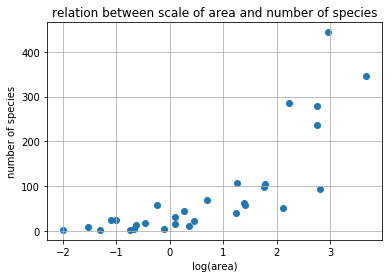

In [241]:
plt.scatter(np.log10(data.Area),data.Species)
plt.title("relation between scale of area and number of species")
plt.xlabel("log10(area)")
plt.ylabel("number of species")
plt.grid()

In [286]:
x = sm.add_constant(np.log10(data[["Area"]]*1000000))
# 1km^2以下のareaがlog10で負になるのを防ぐためm^2に直している

Y = data["Species"]
model = sm.GLM(Y,x, family=sm.families.Poisson())
r = model.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Species   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.25
Date:                Fri, 14 Feb 2020   Deviance:                       651.67
Time:                        21:35:10   Pearson chi2:                     651.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3928      0.137    -10.171      0.000      -1.661      -1.124
Area           0.7777      0.016     47.212      0.000       0.745       0.810
==============================================================================
"""

$$
E[Y] = exp(-1.3928 + 0.7777x)
$$
と表現できるようです。

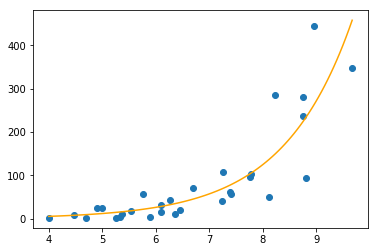

In [288]:
plt.scatter(x["Area"],y)
yy = np.exp(r.params["const"] + r.params["Area"]*xx)
xx = np.linspace(x["Area"].min(),x["Area"].max(),100)
plt.plot(xx,yy,color="orange")

回帰曲線はそれらしく当てはまっていますが、```summary()```のパラメタをみるとあまり芳しい結果ではないですね

参考

https://stats.biopapyrus.jp/glm/poisson-regression.html

# 時系列データ分析

## 相互相関・自己相関

### ベクトルの類似度
あるベクトル $\vec{v_1} = (2,3), \vec{v_2} = (3,5),\vec{v_3}=(-1,-1)$があるときベクトルの類似度は$cos\theta$をつかってあらわすことができます。

なぜならベクトルの内積は、$a \cdot b= a^T b$または$|a||b|cos\theta$とあらわすことができ、$cos\theta$の値は$\theta$つまりベクトル間の角度が大きくなるほど小さくなるからです。


### 相互相関
長さの同じベクトル同士であれば、内積やユークリッド距離を容易に計算できるので類似度がわかります。しかし、長さが異なるベクトル同士の場合は工夫が必要です。

$\vec{x} = (8,9,-5,4,-2,-11), $と$\vec{y} = (-5,4,-2)$を考えます。

あるベクトルAの一部と別のベクトルの類似度を調べるためには相互相関を計算します。
短いほうのベクトルに0をおいて長さをそろて、つぎのように重なり合う部分の内積を順にとっていきます。

最初は左端から始まり

\begin{eqnarray}
8 \ 9 \ -5 \ 4 \ -2 \ &-11& \nonumber \\ \ &-5& \ 4 \ -2  \ 0 \ 0 \ 0 \nonumber
\end{eqnarray}
最後はつぎのようになります。
\begin{eqnarray}
 &8& \ 9 \ -5 \ 4 \ -2 \ -11 \nonumber \\ \ -5  \ 4 \ -2  \ 0 \ 0 \ &0& \nonumber
\end{eqnarray}


### 自己相関

ある関数xが周期関数であるならば、周期を$t$を時間,$T$として次の式であらわすことができます.


$$
x(t) = x(t + T)
$$

時系列データが周期性を持つならば、データのある部分とべつのある部分がおおよそ一致するはずです。この時系列データをベクトルと考えて相互相関を順にずらしながら計算していき、その値がもっとも大きくなったところが周期をあらわしています。(ただし、端から端まで扱うのでもとのデータの倍の長さの対称的な値が返されることに注意)


## ARモデル

## MAモデル

## ARMAモデル

## ARIMAモデル

# その他

## PCAとクラスタリングを用いた施策の提案

## エージェントベースのシミュレーション

### numpyの乱数

### シェリングの住み分けモデル

シェリングの住み分けモデルでは二種類のagentを想定します。それぞれのタイプは250人ずつ存在します。

エージェントは、座標(x,y),0<x<1,0<y<1(x,y),0<x<1,0<y<1に存在します。

それぞれのagentはユークリッド距離($\sqrt{x^2+y^2}$)で最も近くに住む１０人の半分以上が自分と同じタイプであることを好みます（この状態をhappy,それ以外をunhappyとします）。

各期において、エージェントは

1. エージェントは二変量均一分布に従ってS=(0,1)2(0,1)2に配置
2. 移動したほうがhappyになるなら移動し
3. そうでなければ１に戻ります

この手続きを、どのエージェントも移動しようとしない状態まで繰り返します。

初期状態ではエージェントはランダムに均一分布していますが、２期間経過しただけで、それぞれのタイプが分断されてしまいます。

このAgentモデルは、自分と異なるタイプと暮らすことを嫌っていないにもかかわらず、数期間後には分断されてしまいます。

人種間の分居に当てはめてみると、
仮にある人種の人が別の人種の人と隣同士で暮らすことを嫌っていなくても（他の人種と同じ地域に住むことにある程度寛容でも）、自然と人種ごとにわかれて居住してしまうことを説明しています。

Entering loop  1


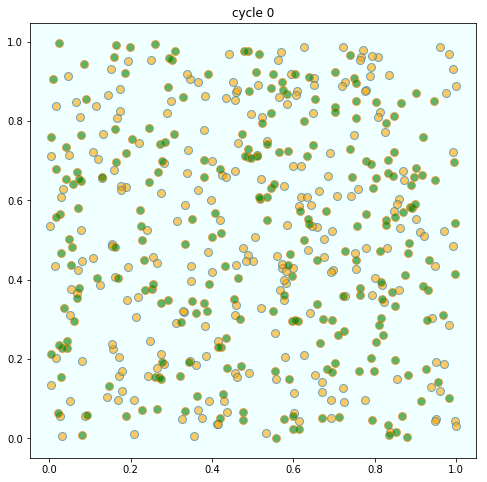

Entering loop  2


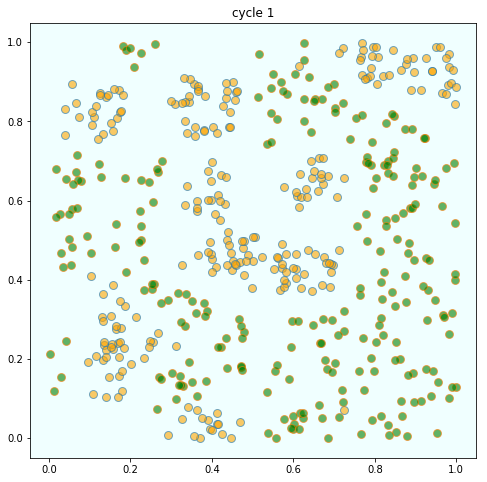

Entering loop  3


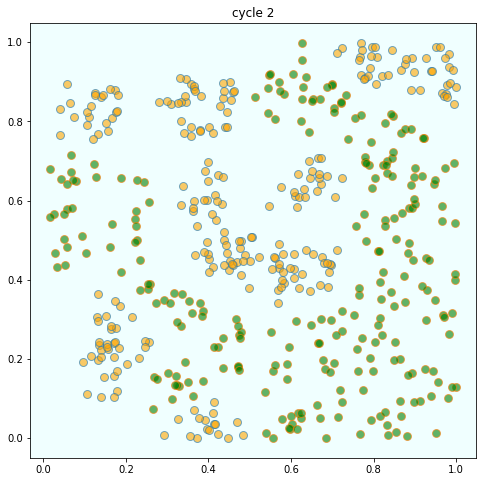

Converged, terminating.


In [299]:
from random import uniform, seed
from math import sqrt
seed(10)

class Agent:
  def __init__(self,type):
    self.type=type
    self.draw_location() # set (x,y)

  def draw_location(self):
    self.location = uniform(0,1),uniform(0,1)

  def get_distance(self,other):
    a = (self.location[0] - other.location[0])**2
    b= (self.location[1] - other.location[1])**2
    return sqrt(a+b)

  def is_happy(self,agents):
    distances=[]
    for agent in agents:
      if self != agent:
        distance = self.get_distance(agent)
        distances.append((distance,agent))
    distances.sort() # 近い順にソート

    neighbors = [agent for dist,agent in distances[:num_neighbors] ]
    num_same_type = sum (self.type== agent.type for agent in neighbors)
    # 近いagent num_neighbors体のうち,同じタイプが閾値以上ならtrue, else false
    return num_same_type >= require_same_type
  def update(self,agents):
    while not self.is_happy(agents):
      self.draw_location()

def plot_distribution(agents,cycle_num):
    x_values_0,y_values_0=[],[]
    x_values_1,y_values_1=[],[]
    for agent in agents:
        x,y= agent.location
        if agent.type==0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)

    fig,ax = plt.subplots(figsize=(8,8))
    plot_args={"markersize":8,"alpha":0.6}
    ax.set_facecolor("azure")
    ax.plot(x_values_0,y_values_0,'o',markerfacecolor="orange",**plot_args)
    ax.plot(x_values_1,y_values_1,'o',markerfacecolor="green",**plot_args)
    ax.set_title(f'cycle {cycle_num - 1}')
    plt.show()

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # エージェントが隣人とみなす人の数
require_same_type = 7   # エージェントは最低でもこの人数隣人が自分と同質なほうを好む

agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))
count = 1
# == 変化がなくなるまで繰り返す  == #
while True:
    print('Entering loop ', count)
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')

### 波及効果のある介入がRCTに及ぼす影響の考察と可視化

## 最適化と漸化式
### 最大和問題 動的計画法
$n$個の異なる整数 $a[0],a[1],a[2],...,a[n-1]$が与えられたとき、これらの整数から任意の数の整数を選んで総和をとった時の総和の最大値を求める場合を考えてみましょう。（なんでそんなことを知りたいのかはのちほど説明します。）

例

$n = 3$

$a =[7,-6,9]$

なら、7と9を選んだ総和16が最大になります。

これはナップサック問題と呼ばれる問題ですが、漸化式を使うことでこの問題を簡単に解くことができます。

状態に関する漸化式をdpで定義します。つまり

dp[0] := 何も選ばない状態(dp[0]= 0)

dp[1] := 0番目までの整数(a[0])の中から整数を選んで総和をとった時の最大値

$\vdots$

dp[i+1] := i番目までの整数(a[0],a[1],a[2],...,a[i])の中から整数を選んで総和をとった時の、総和の最大値

とし、dp[n]を求めます。

dpは漸化式を用いて
$$
dp[i+1] = max(dp[i],dp[i]+a[i] )
$$

と定義できます。

なぜなら、d[i]がわかっているとき、すでにa[0],a[1],..a[i-1]の中からどれを選んだらいいかわかっているので、d[i+1]の時には、a[i]を選ばないか、選ぶかを考えるだけでいいからです。

では、Pythonで実装します。
aを-50から50のランダムに生成した整数100個の配列とします。

In [146]:
dp =[0]*101 # 0で初期化, dp[0]= 0
a=np.random.randint(-50,50,100)
for i in range(100):
    dp[i+1] = max(dp[i],dp[i]+a[i])
dp[-1]

1180

このように、複雑な問題でも動的計画法を使ってすでに分かっている情報や状態遷移を考えることで解を求めることができます。

この例のように

1. 既知の情報を利用する
2. 十分な回数繰り返す

ことで、真の会に近い値を近似的に求める手法はコンピュータを使った科学計算でしばしば使われます。

---

## ベルマン方程式を使った推定

### 線形補完
アイディア：　連続な関数を有限個の点で近似することができます。

今回は連続な関数をコンピュータの有限世界で近似するために使います。

関数を線形に補完することで、情報の欠落を抑えて近似することができます。

https://note.mu/api/v2/attachments/download/f2742ead15f96253e98e987d217209aa

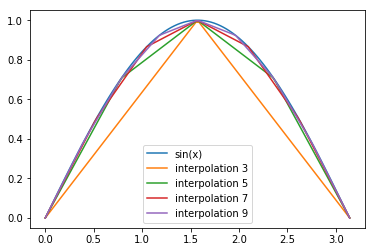

In [40]:
from numpy import interp # linear interpolation

x = np.linspace(0,np.pi,100)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,np.sin(x),label="sin(x)")

for i in np.arange(3,11,2):
    xp = np.linspace(0,np.pi,i)
    yp = np.sin(xp)
    y = interp(x,xp,yp)
    ax1.plot(x,y,label="interpolation {}".format(i))
ax1.legend()
plt.show()

### ベルマン方程式

**ベルマン方程式**

状態sにおける価値（状態価値）$V$を最大にするような$V^\pi (s)$ は、状態sで行動aをとった時に得られる報酬$R_{s,a}$とsで行動aをとった次のステップ(状態), s(s,a)における状態価値を最大にするような$V^\pi(s(s,a))$を割引率で割り引いた和であらわすことができます。

$$
V^\pi (s) = \underset{a}{max} \{ R_{s,a} + \gamma V^\pi(s(s,a))  \}
$$

**マルコフ過程**

> 次のステップの状態st+1が現在の状態sと選択した行動aで確定するシステムのこと



これがベルマン方程式が成り立つ前提条件です。


### 貪欲法

> 貪欲法は局所探索法と並んで近似アルゴリズムの最も基本的な考え方の一つである。 このアルゴリズムは問題の要素を複数の部分問題に分割し、それぞれを独立に評価を行い、評価値の高い順に取り込んでいくことで解を得るという方法である。 動的計画法と異なり保持する状態は常に一つであり、一度選択した要素を再考する事は無い。
(Wikipedia)

### bellman's principle of optiimality 最適性の原理

> 将来のある時点の状態変数の実現値を所与とすれば、その時点以降の決定は、当該状態変数の実現値に対して最適に行われる。

> 最適政策は、最初の状態および最初の決定が何であっても、残りの決定列は最初の決定から生じた状態に関して最適政策を構成するという性質をもつ

https://www.monte-carlo-note.com/2018/09/dynamic-programming.html

### 状態価値の算出
ベルマン方程式は現在の報酬$R_{s,a}$将来の状態価値を使って現在の状態価値を定義していますが、将来の即時報酬の値は不明です。

そこで、この式を説くために将来の即時報酬や将来の状態価値については計算を持ち越します。計算するときにはいったん適当な値を入れておき現在の価値を推定します。



https://program-board.com/2019/11/02/%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E3%81%AB%E3%81%8A%E3%81%91%E3%82%8B%E3%83%99%E3%83%AB%E3%83%9E%E3%83%B3%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E8%A7%A3%E6%B3%95%E3%80%9C%E7%92%B0%E5%A2%83%E3%81%8B/

### 単純な最適経済成長モデル1
+ 減価償却はないものとする
+ $\beta$:割引率 
+ $k$: 資本ストック
+ $c$: 消費
+ 相対的リスク回避度一定(CRRA)型効用関数
+ $V_0$  = 0
+ u: 効用関数

$$
u(c) = \frac{c_t^{\gamma+1}}{\gamma + 1}
$$

$$
\underset{\{c_t,k_{t+1}\}_0^\infty}{max} \sum_0^\infty \beta^t \frac{c_t^{\gamma +1}}{\gamma +1}
$$

subject to

$$
k_{t+1} = Ak_t^{\alpha} + k_t -c_t
$$

$k_{t+1}$期初の資本は t期の生産$Ak_t^\alpha$ から消費$c_t$をひいたもの(= t期の投資) にt期の資本$k_t$に足したものに等しいです



定常状態の資本ストックが1になるようにAを調整し。
$$
A = \frac{1-\beta}{\alpha \beta}
$$
とおきます。

このとき、消費は次のような$k_t,k_{t+1}$の関数で表現できます.

$$
c_t = Ak_t^\alpha + k_t - k_{t+1}
$$

定常状態の資本ストックの水準を1としたので資本ストックを0.2から1.8の間を0.001の感覚で埋めた1600個の点の集合で近似します。

各期の効用$u$は資本ストック$k$を用いて次のように書けます。
$$
u = u(k_t, k_{t+1})
$$
(なぜなら消費は$k_t$と$k_{t+1}$に制約されるから)

以上の条件をもとに価値関数は次のように定義できます
$$
V^*(k_{t}) = \underset{k_{t+1}}{max} (u(k_t,k_{t+1}) + \beta V^*(k_{t+1}))
$$

($t$期に資本ストックが$k_T$のとき(state),右辺を最大にするような来期の資本ストック$k_{t+1}$を選ぶ(action) )

これを十分な回数繰り返すことで価値関数を近似することができます。

In [290]:
import copy
alpha = 0.25 # production factor
beta = 0.9 # discountfactor
delta = 1.0 # 1- depreciation rate
gamma = -2.0

gridmin, gridmax,gridcount = 0.2,1.8,1600
u_grid = np.ones((gridcount,gridcount))*(-100000)
k_grid = np.linspace(gridmin,gridmax,gridcount)
k_next_grid = np.linspace(gridmin,gridmax,gridcount)
for i,k in enumerate(k_grid):
    # k: k_t
    for j,k_next in enumerate(k_next_grid):
        # k_next: k_{t+1} 0.2.0,2...,,,,.1.799999,,1.8
        
        invest = k_next - delta*k
        # t+1期の投資: t+1期の資本 - t期の投資*減価償却率(今回は1: 減価償却なし)
        # 閉鎖経済において貯蓄 = 投資
        # 貯蓄率をsとすると k_{t+1}: t+1期初の資本 = delta*k_t: t期の資本 + sY_t
        # Y_tはt期の生産
        
        consumption = ((1-beta)/(alpha*beta) )*(k**(alpha)) - invest
        # 消費を k_tとk_{t+1} であらわした関数
        
        if consumption > 0:
            u_grid[j][i] = (consumption**(gamma+1))/(gamma + 1) #u(c) :: u(k_t,k_{t+1})
            # 資本k_t に直面したときに、資本k_{t+1}をきめて消費量を決定した場合の効用
v = np.zeros((gridcount,1))

decis = np.zeros((gridcount,1))

rs,cs= u_grid.shape

r = copy.copy(u_grid)

In [291]:
import copy
EPOCHES=1000
# policy は k_tに直面したときのk_{t+1}     

for epoch in range(EPOCHES):
    
    
    r = u_grid + beta*v
        
    
    tv = np.max(r,axis=0)
    #index_of_k_t_1 = np.
    tdecis = np.argmax(r,axis=0)
    decis = tdecis # t;1期の資本水準　indexで渡す
    # 各列の最大値を取得した配列 1×1600
    v = tv.reshape(-1,1)
    # 
    # decis は t+1 期の資本水準のインデックス

policy = k_grid[decis]

p = np.ones((gridcount,1))*(-10000)

for i,k in enumerate(k_grid):
    inv = policy[i] - delta*k # v_{t+1} - delta*k_t  u_grid上の最適化された組み合わせ
    
    cons = ((1-beta)/(alpha*beta))*(k**(alpha)) -inv
    if cons >0:
        p[i] = (cons**(gamma+1))/(gamma+1)
betam = np.ones((gridcount,1))*beta


#opt_policy = -10000*np.ones((gridcount,1))
value = p/(np.ones((gridcount,1))-betam)
# 近似的な価値関数

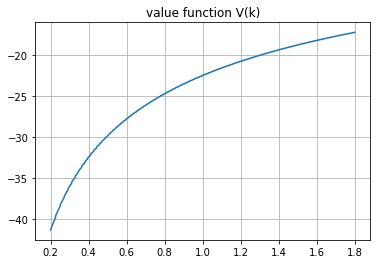

In [294]:
plt.plot(k_grid,value)
plt.title("value function V(k)")
plt.grid()

Text(0.5, 1.0, 'policy function')

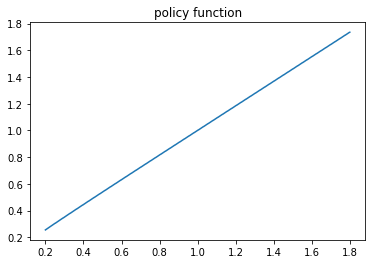

In [293]:
plt.plot(k_grid,policy)
plt.title("policy function")



http://www.ier.hit-u.ac.jp/~nabe/DP_2017.pdf
https://www.sangiin.go.jp/japanese/annai/chousa/keizai_prism/backnumber/h26pdf/201412402.pdf

### 職業探索モデル

次に、McCall モデルの職業選択モデルを考えてみます。

このモデルでは提示される給料$W_t$がある確立分布$\phi$に従うとわかっているとき、各期の求職者は

1. 提示された給料$W_t$を受け入れて働く
2. 提示された給料を断り、雇用保険金cを受け取り、求職を続ける

のどちらかの行動をとります。ただし、簡単のため求職者は永久に生存・その仕事に在職すると仮定し、また昇給・減給は存在しないものとします。

求職者は以上の条件の下で生涯賃金の期待値$E\sum{\beta^t Y_t}$を最大化するように行動します。

ただし、$\beta$は割引率(0～1)、$Y_t$は雇用保険金$c$またはt期に提示された賃金$W_t$をとります。

ある期$i$に$w$を提示された(=s: 状態)求職者は、生涯賃金が最大になるように、提示された給料を受け入れて働くか、求職を続けるかを選びます。

つまり次の価値関数を最大化するように行動します。


$$
v^*(s) = max \left( \frac{w(s)}{1-\beta}, c + \beta \sum_{s'}v^*(s') \phi(s') \right)
$$

$\frac{w(s)}{1-\beta}$は$w(s) + \beta w(s) + \beta^2 w(s) + ... = \frac{w(s)}{1-\beta} $で、今期の給料の提示を受け入れて働た場合の生涯価値です。

maxの右側は、求職を続けた場合の行動を再帰的に表現しています。
つまり、今期は求職を続けcを受け取り、将来のある時点で受け取る給料を$w'$とし、それまではcを毎期受け取り、それ以降は提示された給料$w'$を受け取り働きます。


----

+ 提示される給料$w$の最小値を10, 最大値を60
+ $\phi(w)$はベータ二項分布に従う
とします。

ベータ分布はベータ関数を$B(\alpha,\beta)$と置くと

$$
Be(\alpha,\beta ) = \frac{\theta^{\alpha-1 }(1-\theta)^{\beta -1}}{B(\alpha,\beta)}
$$
とあらわされます。

ベータ分布二項はパラメータ$\alpha,\beta$を操作するとさまざまな確率分布を表現することができるという特徴があります。この特性から得られたデータの分布関数を推定する際にも使われます。
今回はその特徴を活かして給与の確率分布を表現するのに用いています。

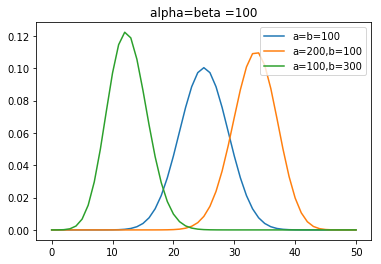

In [300]:
ax = plt.figure().add_subplot(1,1,1)
ax.plot(BetaBinomial(50,100,100).pdf(),label="a=b=100")
ax.set_title("alpha=beta =100")
ax.plot(BetaBinomial(50,200,100).pdf(),label="a=200,b=100")
ax.plot(BetaBinomial(50,100,300).pdf(),label="a=100,b=300")
ax.legend()


今回、$w$は次のような$\alpha=200,\beta=100$のベータ二項分布に従うと仮定します。

Text(0.5, 0, 'wage')

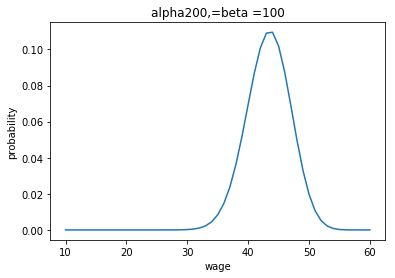

In [301]:
n = 50
beta = 0.99
c = 25
w_min, w_max = 10,60
w_vals = np.linspace(w_min,w_max,n+1)# wの取りうる値
phi_vals = BetaBinomial(50,200,100).pdf()

ax = plt.figure().add_subplot(1,1,1)
ax.plot(w_vals,phi_vals)

ax.set_title("alpha200,=beta =100")
ax.set_ylabel("probability")
ax.set_xlabel("wage")

ある期に給料$w'$を提示されたとき(=s')、求職を続けた時の価値関数を$v^*(s')$とおきます。

$$
h = c + \beta \sum_{s'}v^*(s')\phi(s')
$$
と置きます。

$$
v^*(s) = max \left( \frac{w(s')}{1-\beta}, c + \beta \sum_{s'}v*(s') \phi(s') \right)
$$
より
$$
v^*(s') = \max \left( \frac{w(s')}{1-\beta}, h  \right)
$$
と書けます。

これを、もとの式に代入すると

$$
h = c + \beta \sum_{s'} \max \left( \frac{w(s')}{1- \beta}, h \right) \phi(s')
$$

が得られます。

これは、hに関する非線形方程式です。

ここで[勾配法](#勾配法)を思い出してみましょう。

今回も同様に真の解$h$があるとき、適当な$h$の値を更新していくことで真の値を近似的に求めることができます。

$h'$を次のように置き、$|h-h'|$ が十分に小さくなるようにhを変化させていきます。
$$
h' = c + \beta \sum_{s'} \max \left( \frac{w(s')}{1-\beta}, h \right) \phi(s')
$$

In [344]:
EPOCHES = 500
threshold = (1e-6)
h = np.sum(w_vals * phi_vals)/(1-beta) # initialize h

for epoch in range(EPOCHES):
    h_next = c + beta * np.sum(
        (np.maximum(w_vals/(1-beta),h))*(phi_vals)# pick up each maximum value from both array
        # and return array[max_0,max_1]
    )
    if np.abs(h_next - h) < threshold:
        break
    h = h_next    

h*(1-beta) # 提示される給料がこの額の時求職をやめるのが最適

47.316499692941875